In [65]:
import nltk
import numpy as np
import pandas as pd
from textblob import TextBlob
import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer 

from nltk.tokenize import TweetTokenizer

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

import random
import string
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer        
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, classification_report

from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# Load Data

In [66]:
df = pd.read_csv("K8 Reviews v0.2.csv")

In [67]:
df.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [68]:
df.sentiment.value_counts(normalize=True)

0    0.52552
1    0.47448
Name: sentiment, dtype: float64

In [69]:
df.shape

(14675, 2)

# Convert the review to lower case

In [70]:
reviewCol = df['review'].str.lower()

In [71]:
data = list(df['review'].str.lower())

In [72]:
reviewCol

0                   good but need updates and improvements
1        worst mobile i have bought ever, battery is dr...
2        when i will get my 10% cash back.... its alrea...
3                                                     good
4        the worst phone everthey have changed the last...
5        only i'm telling don't buyi'm totally disappoi...
6        phone is awesome. but while charging, it heats...
7                          the battery level has worn down
8        it's over hitting problems...and phone hanging...
9        a lot of glitches dont buy this thing better g...
10                                                   wrost
11       good phone but charger not working / damage wi...
12       don't purchase this item, it is so much of hea...
13       i have faced the battery problem and motherboa...
14       very good phone slim good battry backup good s...
15                                headset is not available
16       every time automatic on and off so kindly sugg.

In [73]:
df['reviewLower'] = pd.Series(reviewCol, index=df.index)

# Remove stop words and other words except noun

In [74]:
nouns = []
for item in reviewCol:
    eachRow = []
    zen = TextBlob(re.sub("/b[0-9]/b","", item.replace(".", " ")))
    for sent in zen.sentences:
        for word in sent.tags:
            if re.match('NP*', word[1]):
                if not word[0] in stopwords.words('english'):
                    eachRow.append(word[0])
    nouns.append(list(set(eachRow)))
    print(list(set(eachRow)))

['improvements', 'updates']
['lenove', 'charger', 'hours', 'uses', 'mobile', 'amazon', 'battery', 'backup', 'hell', 'idle', 'lie']
['cash', '%']
[]
['problem', 'amazon', 'everthey', 'phone']
['money', 'camerawaste']
['k8', 'reason', 'phone']
['battery', 'level']
['problems', 'note', 'lenovo', 'years', 'phone', 'ahmedabad', 'station', 'hanging']
['thing', 'glitches', 'options', 'lot']
['wrost']
['damage', 'months', 'charger', 'phone']
['item', 'battery', 'life']
['motherboard', 'mobile', 'battery', 'life', 'months', 'problem']
['slim', 'phone', 'battry', 'backup', 'screen']
['headset']
['time']
['deal', 'comparison', 'mobile', 'phone', 'amazon', 'specification', 'seal', 'range', 'product', 'card', 'credit', 'prize']
['battery', 'life', 'solutions']
['smartphone']
[]
['galery', 'problem', 'speaker', 'phone']
['battery', 'features', 'camera', 'speed']
['product']
['lenovo', 'camera', 'phone', 'battery', 'product', 'os']
['option', 'options', 'hotspot', 'call', 'mobile', 'cast', 'screen']


['battery', 'life', 'issue', 'phone']
['phone']
['call', 'recorder', 'key', 'problem', 'backup']
['thanx', 'performance']
['phone']
['charge', 'wrost', 'chrger', 'selfie', 'camera', 'mobile', 'turbo', 'lot', 'tym']
['month', 'charger', 'handset', 'accessories', 'quality']
['issue', 'customers', 'please', 'battery', 'something']
['super']
[]
[]
['software', 'update', 'description']
['product', 'bakwas', 'ekdum']
['performance']
['battery', 'camera', 'mistake', 'phone']
['battery', 'backup']
['print', 'side', 'deapth', 'mode', 'glass', 'senser', 'camera', 'time', 'phone', 'update', 'battery', 'opinion', 'problem', 'buttons', 'screen', 'gorilla', '😎😎']
['battery', 'data', 'works', 'sim']
['group', 'camera', 'product', 'battery', 'age', 'quality', 'backup', 'screen', 'clarity']
['thank', 'mode', 'days', 'camera', 'phone', 'amazon', 'depth', 'battery', 'thing', 'price', 'use']
['system', 'lte', 'internet', 'time', 'product', 'network']
['bugs', 'bit', 'cost', 'smartphone']
['product']
['cra

['package', 'phone', 'head']
['features', 'value', 'pricing', 'money']
['battery', 'camera', 'class']
['battery', 'phone']
[]
['product', 'price']
['quality', 'days', 'phone']
['chargre']
['performance', 'illuminating', 'brightness', 'images', 'camera', 'picture', 'irritating', 'eyes', 'quality']
['depth', 'camera', 'mode']
['camera']
['super', 'phone']
['product', 'service']
[]
['problems', 'crap', 'day', 'note', 'dolby', 'earphones', 'please', 'years', 'phone', 'sound', 'ignore', 'problem', 'screen', 'models']
['product', 'delivery', 'amazon']
['charge', 'flaw', 'day', '%', 'hours', 'data', 'call', 'phone', 'awesome', 'mah', 'battery', '*by', 'mins', 'price', 'gaming', 'use']
['problem', 'battery', 'please', 'time']
['charge', 'experience', 'day', 'installation', 'camera', 'time', 'phone', 'battery', 'quality', 'backup', 'hour', 'speed']
['performance', 'case', 'everything', 'effect', 'product', 'phone', 'cover']
['lenovo']
[]
['speaker', 'lenovo', 'camera', 'mobile', 'company']
['sm

['camera', 'battery', 'money', 'worth', 'backup']
['battery', 'details', 'usage', 'phone']
['help', 'speakers', 'pls', 'phone']
[]
['supar', 'k8', 'note', 'lenovo']
['product']
[]
['lovers', 'game', 'phone']
['camera', 'phone', 'battery', 'color', 'heating', 'gold', 'range', 'problem', 'screen']
['day', 'capacity', 'phone', 'headset', 'battery', 'guard']
['android', 'lenovo', 'days', 'battery', 'life', 'stock', 'use', 'smooththanks']
['phone']
['medium', 'battery', 'camera', 'performance']
['phone']
['camera', 'phone']
['service', 'phone']
['day', 'note', 'year', 'relay', 'lenovo', 'rating', 'days', 'product', 'mobile', 'battery', 'heating', 'start', 'feb', 'quality', 'k8']
['someone']
['go', 'brands', 'end', 'redmi', 'rear', 'camera', 'phone']
['❤️😄😍', 'charge', 'planning', 'n', 'days', 'camera', 'mobile', 'amazon', 'tis', 'oly', 'mths', 'price', 'product', 'super', 'stand']
['worry', 'weeks', 'dont', 'helios', 'phone', 'processor', 'issues', 'heating', 'money']
['excellent']
['phone'

['phone']
['issue', 'amazon', 'phone', 'money', 'network', 'instumet']
['%', 'mobile']
['features', 'fast', 'battery', 'sound', 'quality', 'backup', 'display']
['games', 'mark', 'days', 'hang', 'turbo', 'application', 'occasions', 'use', 'money', 'product', 'till']
['excellent']
['screen', 'card', 'phone', 'head']
['hotport']
['camera', 'time']
['set']
['memory', 'calls', 'strength', 'vice-versa', 'action', 'file', 'uses', 'phone', 'time', 'phones', 'mins', 'transfers', 'product', 'network', 'idle']
['working']
['device', 'works']
['note', 'fetures', 'camera', 'phone', 'updation', 'mobile', 'battery', 'suggestion', 'friends', 'product', 'backup', 'k8', 'upadatons']
['camera', 'phone']
['experience', 'centre', 'bill', 'manner', 'people', 'share', 'days', 'phone', 'amazon', 'services', 'service', 'device', 'problem']
['problem']
['issue', 'sim', 'phone', 'support', 'service', 'sms']
['faulty', 'product', 'piece', 'problem', 'turbocharger']
[]
['amazon', 'service', 'grt', 'phone']
['every

['speaker', 'time']
['network', 'issues', 'mobile']
['auto', 'volume', 'keys', 'mode']
['charge', 'centre', 'camera', 'service', 'solution', 'problem', 'query']
['♥️', 'phone']
['super']
['charge', 'issue', 'a1', 'mi', 'hours', 'camera', 'utilization', 'battery', 'hangs', 'price', 'configuration', 'quality', 'backup']
['video', 'data', 'song', 'phone', 'time', 'battery', 'heat', 'temperature']
[]
['mode', 'volte']
['performance', 'feature', 'screen', 'phone', 'split', 'tasking', 'gaming', 'product', 'multi']
['average', 'complaints', 'performance', 'note', 'day', 'time', 'phone', 'battery']
['issue', 'phone', 'software', 'price', 'range']
['product']
['charging', 'exception', 'drain', 'p1', 'sim', 'performance', 'builth', 'style', 'ejector', 'camera', 'battery', 'turbo', 'makan', 'kcharger', 'iphone', 'speed']
['product', 'problem', 'heating']
['sensor', 'problem', 'battery', 'fingerprint']
['*', 'quality', 'camera', 'phone']
['charger', 'customer', 'amazon', 'care', 'product', 'hell']

['hand', 'experience', 'anything', 'glass', 'scrathes', 'dont', 'prey', 'pocketvery', 'thing', 'phone', 'amazon', 'proplem', 'products', 'use', 'gorilla']
['minutes', 'lights', 'display', 'charger', 'backup', 'hours', 'camera', 'night', 'battery', 'life', 'heat', 'keys', 'user']
['avarge']
['mode', 'camera', 'phone', 'depth', 'decent']
['option', 'fase', 'google', 'internet', 'request', 'fuction', 'amazon', 'problem', 'cast', 'product', 'apps', 'screen', 'need', 'miter', 'speed']
['issue', 'phone']
['value', 'mobile', 'phone', 'hang', 'battery', 'heating', 'life', 'money', 'problem', 'r/sir', 'thanks']
['use', 'phone']
['price', 'options', 'phone']
['issue', 'space', 'works', 'phone']
['expections', 'battery']
['feel', 'mode', 'core', 'wow', 'processes', 'delay', 'nothing', 'camera', 'apps', 'weeks', 'night', 'phone', 'mah', 'hang', 'battery', 'review', 'use', 'morning', 'lip']
['fan', 'product', 'decade', 'lenovo']
['value', 'issues', 'money']
['data', 'phone', 'jio', 'budget', 'quali

['features']
['killer', 'smartphone', 'performance']
['quality', 'camera', 'video']
['drawback', 'performance', 'speed']
['battery', 'issue', 'performance', 'phone']
['everything', 'heating', 'issues', 'price', 'product']
['lenovo', 'cost', 'features', 'mobile']
['product']
['specification', 'chargers']
['problem', 'battery', 'purchase']
['phone']
[]
['information', 'box', 'charger', 'turbo', 'piece', 'product']
['touchpad', 'amazon', 'replacement', 'executive', 'person', 'purchase']
['price', 'phone']
['p', 'im', 'camera', 'show']
['product', 'waste']
['micro', 'mobilepeople', 'pls', 'k8', 'oven', 'dress']
['specialy', 'performance', 'class', 'lenovo', 'camera', 'phone', 'worth', 'butterfly', 'processor', 'graphics', 'screen', 'buying']
['worste', 'a1', 'camera', 'mode']
['music', 'player', 'app', 'camera', 'lock', 'reare', 'battery', 'vedio', 'screen', 'shot']
['battery', 'backup', 'thing']
[]
['system', 'finger', 'lights', 'button', 'thing', 'unlock', 'phone', 'message', 'power', 's

['product']
['phone', 'mobile']
['issue', 'centre', 'warranty', 'please', 'phone', 'exchange', 'battery', 'service', 'problem', 'procedure', 'times']
['heat']
['battery', 'backup']
['g5', 'mark', 'build', 'lag', 'hrs', 'camera', 'phone', 'time', 'battery', 'perc', 'moto', 'processor', 'lots', 'quality', 'backup']
['response', 'camera', 'mobile', 'amazon', 'sound', 'heating', 'problem']
['micro', 'tray', 'sd', 'card']
['awesome']
['network', 'phone', 'star']
['phone']
['charger']
['today', 'phone']
['goof']
['phone']
['work', 'experience', 'speaker', "does't"]
['lenovo', 'everything', 'jus', 'cam', 'price', 'range']
['charing', 'battery', 'cost', '%']
['speakers', 'camera']
['months', 'fault']
['mobile']
[]
['battery', 'issue', 'backup', 'phone']
['packup', 'features']
['amazon', 'shopping', 'phone']
['ka', 'ghatiaa', 'lenovo', 'sabase', 'phone', 'battery']
['day', 'selfie', 'camera', 'battery', 'phn']
['value', 'issue', 'battery', 'heating', 'application', 'money', 'backup']
[]
[]
['ca

['price', 'mobile']
['turbo', 'charging', 'experience', 'bettry']
['acoumnt', 'mony', 'casback']
['product']
['music', 'management', 'earphones', 'ram', 'mobile', 'tasking', 'problem', 'visibility', 'multi', 'display']
['quality', 'works', 'note', 'lenovo', 'camera', 'product']
['problem3', '⚠️', '👍5', 'camera', 'amazon', 'problem4', 'quality', 'display']
['charge', 'month', 'charger', 'hours', 'amazon', 'phone', 'handset']
['fast', 'lag', 'camera', 'smartphone', 'super', 'display']
['payment', 'issue']
[]
['problem', 'heeting']
['mode', 'speakers', 'camera', 'battery', 'quality', 'backup']
['performance']
['camera', 'phone', 'sound', 'heating', 'quality', 'times']
['thak']
['sound', 'waste', 'recorderdump', 'cast']
['memory', 'features', 'hours', 'lenovo', 'camera', 'product', 'clarity', 'battery', 'heating', 'problem', 'gb']
['worth']
['market']
['fault', 'delivery', 'sim', 'days', 'amazon', 'package', 'card', 'handling']
['value', 'issue', 'money']
['charge', 'note', 'stop', 'lenovo

['looks', 'day', 'bactory', 'lot', 'need']
['problems', 'pics', 'rest', 'note', 'gallery', 'manager', 'lenovo', 'time', 'file', 'k8']
['average', 'hit', 'camera', 'phone', 'smoother', 'quality']
['voice', 'record', 'call', 'options']
['week', 'phone', 'goa', 'station', 'police']
['price', 'days']
['par', 'option', 'enoughspeaker', 'resolution', 'camera', 'phones', 'battery', 'buy', 'budget', 'quality', 'buttons', 'screen']
['price', 'mobile']
['discount', '%']
['memory', 'phone', 'software', 'hangs', 'update', 'applications', 'restarts', 'something']
['memory', 'front', 'inbuilt', 'slot', 'sim', 'glass', 'ram', 'flash', 'camera', 'thing', 'mobile', 'battery', 'price', 'backup', 'card', 'display', 'clarity']
['everything', 'past', 'price', 'try', 'range', 'audio', 'performance', 'thing', 'camera', 'nothing', 'device', 'strategy', 'devices', 'boke', 'problems,1', 'effect', 'marketing', 'product', 'bluetooth']
['tag', 'exciting', 'priority', 'note', 'request', 'provision', 'camera-', 'pri

['glass', 'camera', 'phone', 'battery', 'quality', 'backup', 'gorilla']
['problem', 'month', 'mobile']
['function', 'battery', 'sound', 'camra', 'speed']
['front', 'day', 'camera', 'phone', 'battery', 'lost']
['colors', 'earphone', 'box', 'screens', 'thing', 'picture', 'phone', 'app', 'problem', 'today', 'use', 'screen', 'shades']
['super']
['smoothcons', 'batterystock', 'fix', 'androidvery', 'camera', 'pros', 'software', 'update', 'overheats']
['cameras', 'gallery', 'pros', 'picture', 'players', 'lack', 'quality', 'music', 'goodcons', 'satisfying', 'camera', 'customization', 'apps', 'operating', 'battery', 'life', 'front', 'expectation', 'impact', 'display']
['product', 'packaging']
['average', 'dolby', 'model', 'features', 'charger', 'call', 'camera', 'numbers', 'time', 'strep', 'screen', 'recording', 'bank', 'k4', 'party', 'auto', 'app', 'blair', 'one8', 'light5', 'sleep', 'power', 'note10', 'flip', 'cover', 'leg', 'side', 'like1', 'effect', 'feature']
['break', 'fall', 'gen', 'deli

['minutes', 'issue', 'panel', 'strength', 'name', 'heats', 'days', 'reality', 'mobile', 'game', 'pain', 'specification', 'signal', 'warm', 'hand', 'mobiles', 'k8', 'helio', 'incorrect', 'features', 'sim', 'dont', 'lenovo', 'drop', 'call', 'camera', 'recorder', 'amazon', 'mediatek', 'phones', 'processor', 'heating', 'usage', 'lot', 'device', 'friends', 'network', 'notification', 'speed', 'x23', 'x20', 'expectations', 'return', 'policy', 'phone', 'battery', 'mins', 'support', 'test', 'browsing', 'use', 'ear', 'mistake6', 'airtel', 'experience', 'function', 'expectations9', 'bars', 'sale', 'issues', 'money', 'product', 'heat', 'nano', 'mistake']
['model']
['star']
['average', 'note', 'return', 'camera', 'phone', 'battery', 'heating', 'drainage', 'restarts', 'refund', 'star']
[]
['thank', 'u', 'product', 'package', 'excellent']
['product']
['wr', 'charge', 'service', 'wt']
['mirror', 'sim', 'worts', 'phone', 'cast', 'company']
['mobile']
['quality']
['backcharger', 'charge', 'hour']
['feat

['experience', 'cover', 'way', 'phone', 'time', 'quality', 'display']
['reply', '%', 'headphone', 'jack', 'customer', 'phone', 'amazon', 'battery', 'issues', 'service']
['expectations', 'performance']
['phone', 'mobile']
['issue', 'professional', 'market', 'lenovo', 'product', 'service', 'persons', 'center', 'quality', 'network']
[]
['management', 'performance', 'battery', 'heating', 'othervise', 'problem', 'backup', 'drains']
['invoice']
['fast', 'semma', 'phone']
['speaker', 'dueto', 'jan2018', 'options', 'picture', 'mono', 'phone', 'quality']
['case', 'wifi', 'rest', 'hrs', 'factory', 'phone', 'time', 'issues', 'months', 'network', 'success', '-hotspot']
['value', 'month', 'glass', 'flipkart', 'amazon', 'exchange', 'phone']
['headphones']
['cake', 'performance', 'camera', 'sound', 'quality', 'display', 'cherry']
['camera']
['waste', 'money']
[]
['ok']
['one']
['backup']
['sestem', 'hangup', 'phone']
['minutes', 'heating', 'system', 'usage']
['charge', 'charger', 'camera', 'phone', '

['pic', 'pics', 'issue', 'dept', 'mp', 'camera', 'phone', 'inspite', 'cam', 'dullbattery', 'quality', 'backup']
['issue', 'phone', 'light', 'months', 'quality']
['memory', 'speed', 'needs', 'camera', 'phone', 'software', 'consuntil', 'papers', 'engineers', 'clarity']
[]
['phone']
['list', 'minutes', 'numberit', 'request', 'people', 'foolit', 'temperaturei', 'number', 'product']
['conversation', 'provision', 'utility', 'phone', 'cast', 'screen']
['phone']
['day', 'phone', 'battery', 'backup', 'packaging']
['%', 'performance', 'days', 'phone', 'heat']
['problem', 'heating']
['jan', 'mobile']
['deapth', 'access', 'photos', 'camera', 'pls', 'compare', 'power', 'network', '😢😢', 'speed']
['experience', 'terrific', 'word']
['hai', 'bahut', 'version', 'kharab']
['case', 'days', 'guys', 'service', 'problem', 'desk', 'shot', 'thing', 'amazon', 'consumer', 'device', 'screen', 'refund', 'customer', 'phone', 'jio', 'signals', 'forum', 'airtel', 'reason', 'product', 'times']
['product', 'waste']
['s

['option', 'prashant', 'records', 'lenovo', 'call', 'mobile', 'fan', 'pc', 'screen', 'brand']
['phone']
['phone']
['lenovo', 'mobile', 'motorola', 'waste', 'moto', 'money', 'china', 'problem']
['glass', 'earphones', 'amount', 'part', 'nothing', 'camera', 'phone', 'phones', 'sound', 'quality', 'distance', 'display', 'happens']
['awesome']
['owsm', 'mobile']
['dark', 'lit', 'killer', 'bottom', 'phone', 'phones', 'home', 'buttons', 'enhancements']
['range', 'price', 'phone']
['gus']
['sensor', 'fine', 'loot', 'fingerprint', 'camera', 'phones', 'battery', 'range', 'quality']
['sensor', 'rest', 'thing', 'phone', 'battery', 'state', 'fingerprint', 'backup']
['experiences']
['experience']
['quality', 'customers', 'mode', 'dont', 'heats', 'hours', 'lenovo', 'camera', 'pls', 'mobile', 'depth', 'time', 'battery', 'use', 'product', 'drains']
['mobile']
['party', 'model', 'call', 'recorder', 'facility', 'apk']
['support', 'helpline', 'call', 'please']
['result']
['range']
['iphone6', 'substitute',

['brandambassador']
['problems', 'year', 'battery', 'signal', 'problem', 'purchase']
['working']
['kept', 'pocket', 'mobile']
['everything', 'lenses', 'work', 'button', '%', 'lenovo', 'july', 'sleek', 'choice', 'battery', 'power', 'lenevo', 'looks', 'updates', 'reveiwers', 'pics', 'slr', 'reviewers', 'optimisation', 'variant', 'issue', 'glass', 'cons', 'smartphone', 'price', 'light', 'heck', 'android', 'yes', 'betterment', 'user', 'something', 'users', 'point', 'innovation', 'lag', 'standby', 'mind', 'front', 'rest', 'messages', 'condition', 'update', 'patches', 'note', 'selfie', 'share', 'sd', 'pros', 'shot', 'aspect', 'apps', 'sincei', 'patch', 'utelisation', 'ram', 'phone', 'kuddos', 'software', 'depth', 'budget', 'compromise', 'delivers', 'core', 'camera', 'stock', 'venom', 'anything', 'today', 'menu', 'charm', 'thanks', 'works', 'segment', 'replacement', 'lets', 'issues', 'product']
[]
['feature', 'range', 'price', 'phone']
[]
['minutes', 'recharge', 'issue', 'hrs', 'camera', 'mob

['use', 'super']
['things', 'rear', 'camera', 'picture', 'time', 'flash', 'focus', 'area', 'light', 'pictures']
['product']
['bass', 'mode', 'camera', 'product', 'sound', 'quality']
['waste', 'money']
['mobile']
['front', 'resultspoor', 'flash', 'camera']
['product']
['super', 'mobile']
['product', 'quality']
['offer', 'issue', 'screens', 'everything', 'tasking', 'fast', 'camera', 'time', 'buy', 'heating', 'split', 'sides', 'device', 'backup', 'honor', 'battery', 'multi', 'drawback', 'forums', 'redmi', 'samsung', 'issues', 'cast', 'product']
['phone']
['phone']
['mobile']
['warm', 'camera', 'performance', 'mobile']
['games', 'beast', 'phone', 'range', 'price', 'warm']
['features', 'osm', 'camera']
['worth', 'money', 'phone']
['excellent', 'mobile']
['bez', 'show', 'camera', 'materials', 'cover', 'photos']
['device', 'self']
['customar', 'wise', 'number', 'problem', 'earsets']
['experience']
['smart', 'ஆடம்பரம்', 'core', 'media', 'இல்லாத', 'meமிகவும்', 'tek', 'value', 'weights', 'proces

['value', 'range', 'money', 'phone']
['class']
['core', 'sec', 'gaming', 'k8', 'clarity', 'image', 'music', 'mark', 'performance', 'runs', 'call', 'camera', 'etc', 'processor', 'stuffs', 'k6', 'slide', 'cancellation', 'phone', 'battery', 'photos', 'updates', 'superb', 'multitasking', 'lots', 'fingerprint']
['issue', 'mode', 'oreo', 'lenovo', 'camera', 'app', 'phone', 'update', 'issues', 'price', 'problem', 'updates']
['value', 'features', 'performance', 'phone', 'mobile', 'phones', 'battery', 'cam', 'money', 'fingerprint', 'friends', 'price', 'backup', 'word']
['bylenovothanku', 'delivery', 'amazon', 'musicbattery', 'atmos', 'look', 'product', 'cameradolby']
['phone', 'time']
['product', 'battery', 'backup']
['volume', 'button', 'centre', 'note', 'please', 'k8', 'phone', 'service', 'power', 'months', 'buttons', 'lenevo']
['value', 'gr8', 'front', 'year', 'camera', 'phone', 'battery', 'money', 'budget', 'food']
['speech', 'volume', 'video', 'purpose', 'maneuvers', 'lenovo', 'factory', '

['system', 'download', 'internet', 'error', 'battery', 'price', 'uploading', 'speed']
[]
['heatingupdate', 'night', 'phone', 'time', 'usage', 'restarts', 'times']
['help', 'vidieo', 'pls', 'phone', 'reason', 'power', 'problem']
['problem', 'day', 'condition']
['call', 'phone', 'battery', 'use', 'hour']
['omg', 'battery', 'seal', 'phone']
[]
['issue', 'drain', 'heating', 'problem', 'qualitynetwork']
['delivery']
['phone']
['product']
['price', 'phone']
['product', 'one', 'mark']
['battery', 'life']
['invoice', 'need', 'guide']
['issue', 'phone', 'software', 'update', 'sound', 'half', 'problem', 'someone']
['mobile']
['phone']
['flickering', 'product', 'screen']
['camera']
['issue', 'slot', 'sim', 'alarm', 'everything', 'camera', 'thing', 'mobile', 'jio', 'network', 'star']
[]
['problem', 'speakers', 'mobile']
['usecharging', 'drain', 'faulty', 'productbattery']
['hours', 'battery', 'drain']
['mode', 'video', 'stops', 'bit', 'camera', 'turbo', 'issues1', 'product']
['performance', 'oohhh

['super']
['system', 'experience', 'nice', 'camera']
['note', 'lenovo', 'battery', 'k6', 'product', 'backup', 'k8']
[]
['time', 'issues', 'sims', 'product', 'signals']
['product', 'value', 'money']
['plz', 'sir', 'problem', 'link', 'product', 'pc', 'mob', 'nano']
['expectations', 'product']
['product', 'heat', 'problem', 'time']
['wise', 'feature', 'phone', 'look', 'fills', 'hand']
[]
['prob', 'jack']
['battery', 'backup']
['caste', 'feature', 'atmos', 'dollby', 'screen']
['problem']
['budget', 'phone']
['performance', 'bty', 'phone', 'specification', 'price']
['value', 'mark', 'performance', 'dolby', 'camera', 'design', 'applications', 'atmos', 'money', 'loads', 'speakers', 'cases']
['day', 'camera', 'phone', 'sound', 'issues', 'look']
['screen', 'mirror', 'star']
['anything', 'ways', 'performance', 'selfie', 'camera', 'hunting', 'mobile', 'use']
['product', 'note']
['company', 'chipset', 'mistake']
['phone', 'mobile']
['k8', 'phone', 'note']
['fast', 'charging', 'backup', 'phone']
['

['touch', 'customer', 'support', 'problem', 'network', 'display']
['withthismob']
['value', 'company', 'phone', 'configuration', 'money', 'range', 'price', '👌👌']
['issue', 'wit', 'cameras', 'modes', 'mp', 'camera', 'mobile', 'tis']
['price', 'phone']
['value', 'experience', 'features', 'phone', 'money']
['pakiging', 'product', 'qulity', 'quility']
['network', 'issue', 'performance']
['minut', 'hase', 'processor', 'media', 'tack']
['look']
['issue', 'anyone', 'video', 'playback']
['phone', 'im']
['phone']
['service', 'smartphonene', 'amezon']
['problem', 'signal']
['regards', 'touch', 'phone', 'issues', 'times']
['problems', 'till', 'camera', 'lookperformance']
['product', 'price']
['battery', 'value', 'money']
['phone']
['quality', 'camera', 'picture']
['product']
['design', 'camera', 'show']
[]
['prize']
['charging', '%', 'hours', 'everything', 'time', 'turbo', 'lie']
['phone']
['performance', 'note', 'call', 'customer', 'period', 'phone', 'time', 'battery', 'record', 'support', 'life

['calls', 'issue', 'speaker', 'asphalt', 'case', 'toolcamera', 'hours', 'mobile', 'hangs', 'sec', 'date', 'system', 'music', 'mark', 'performance', 'photography', 'day', '%', 'charger', 'pricing', 'time', 'etc', 'turbo', 'handgs', 'package', 'apps', 'screen', 'recording', 'user', 'point', 'contacts', 'default', 'video', 'adapter', 'ram', 'sucks', 'night', 'phone', 'mah', 'battery', 'review', 'guard', 'max', 'photos', 'os', 'daylight', 'plastic', 'games', 'motion', 'cable', 'ejector', 'experiencebattery:4000', 'segment', 'keeps', 'software', 'videos', '>', 'issues', 'months', 'images', 'times', 'traffic', 'word']
[]
['memory', 'speaker', 'photo', 'note', 'dolby', 'speakers', 'terms', 'k8', 'features', 'camera', 'screen', 'k4', 'ram', 'phone', 'power', 'flip', 'present', 'function', 'atmos']
['hmmm']
['device']
[]
['offer', 'note', 'phone', 'idea', 'k8', 'team']
['mark', 'photo', 'flash', 'camera', 'quality']
['features']
['experience']
['experience', 'android', 'selfie', 'camera', 'batt

['g5s', 'phone']
['mark', 'camera', 'phone']
[]
[]
['battery', 'day', 'performance']
['mobile']
['product', 'value', 'money']
['music', 'karo', 'hai', 'call', 'time', 'phone', 'key', 'tab', 'lagti']
['performance', 'please', 'night', 'camera', 'software', 'area', 'report', 'indore']
['g', 'time', 'inspite', 'software', 'battery', 'updates']
['mark', 'front', 'camera', 'phone', 'lot']
['mobil', 'mansoor', 'price', 'thanks']
['issue', 'front', 'performance', 'camera', 'multitasking', 'range', 'quality', 'heat', 'speed']
['level', 'others']
['option', 'side', 'note', 'market', 'gallery', 'everything', 'becoz', 'hidden', 'edges', 'guard', 'screen', 'k8', 'display']
['problem', 'battery']
['lenovo', 'camera', 'product', 'support', 'battery', 'lots', 'problem', 'notification', 'volte']
['product', 'brother', 'scoldings', 'im']
['super', 'phone']
['monile']
['product', 'waste']
['value', 'money']
['product', 'camrera', 'feature']
['product']
['mark', 'note', 'killer', 'lenovo', 'dolby', 'soun

['product']
['hours']
['experience', 'second', 'agents', 'customer', 'phone', 'amazon', 'product', 'anyone', 'liers']
['performance', 'phone', 'phonethe', 'problem', 'network', 'lethe']
['arrival', 'customer', 'cash', 'configuration', 'buyer', 'product']
['phone']
['product']
['deca', 'core', 'phone', 'processor', 'rs', 'india']
['phone', 'mobile']
['issue', 'backup', 'hardware', 'mobile', 'battery', 'problem', 'hanging']
['core', 'week', 'executive', 'care', 'one', 'charger', '%', 'pick', 'mtk', 'amazon', 'processor', 'return', 'choice', 'people', 'customer', 'phone', 'battery', 'waste', 'money']
[]
['battery', 'backup', 'phone']
['games', 'charger', 'phone', 'turbo', 'range', 'price', 'warm']
[]
['value', 'performance', 'selfi', 'battery', 'cam', 'money', 'backup']
[]
[]
['experience', 'note', 'future', 'smartphone', 'months', 'product']
['voice', 'issue']
['garila', 'backup', 'bettry', 'glass']
['issues', 'phone']
['day', 'video', 'feel', 'mobile', 'superb', 'range']
['/sysem', 'dra

['worstpurchaseever', 'draining', 'recharge', 'god', 'fault', 'day', 'hours', 'lenovo', 'sd', 'thing', 'way', 'standby', 'mediatek', 'iron', 'processor', 'battery', 'smartphone', 'problem']
['charge', 'charger', 'day', 'hrs', 'camera', 'phone', 'battery', 'life', 'turbo', 'quality', 'user']
['slots', 'volume', 'gallery', 'pros', 'cons', 'speakers', 'rocks', 'music', 'sim', 'card', 'supports', 'delivery', 'storage', 'earplugs', 'app', 'support', 'battery', 'headsets', 'player', 'lte', 'rest', 'design', '/', 'look', 'cons:1']
['worth', 'price']
['use']
['cool']
['item', 'earphone', 'box', 'please', 'mobile']
['issue', 'mode', 'edge', 'bit', 'camera', 'phone', 'detection', 'depth', 'battery', 'drains']
['purpose', 'screen', 'tv', 'cast']
['months', 'charger']
['phone']
['mi', 'note', 'game', 'camra', 'money', 'deal']
['hours', 'battery', 'work', 'power']
['ers', 'quality', 'experience', 'sooper', 'dolby', 'class', 'camera', 'phone', 'buy', 'atmos', 'budget', 'excellent', 'backup', 'till']

['games', 'battery']
['bit', 'issue', 'phone']
['monhhs', 'battery', 'backup', 'products']
['phone']
['product', 'charger', 'phone']
['product', 'get', 'money']
['money', 'waste', 'performance']
['lenovo', 'material', 'type', 'person', 'product', 'working', 'thanks']
['issue', 'sound', 'cons', 'quality', 'performance', 'android', 'thing', 'phones', 'buy', 'stock', 'headphones', 'lags', 'pro:13+5mp', 'charge', 'phone', 'battery', 'cam', 'experience', 'front', 'moto', 'product']
['packing', 'earphone', 'grt', 'delivery', 'lowlight', 'camera', 'amazon', 'phones', 'battery', 'sound', 'compare', 'device', 'whn']
['mobilecamera', 'money']
['features', 'picture', 'gimmick', 'phone', 'problem', 'heating', 'headphones', 'marketing', 'power', 'quality']
['option', 'functionality', 'note', 'feature', 'phone', 'support', 'ots', 'company', 'product', 'casting']
['delivery', 'phone', 'time']
['star']
['product']
['features', 'mobile']
['problem', 'mobile']
['god', 'days']
['superb', 'phone']
['crite

['account', 'saver', 'gmail', 'falls', 'memory', 'details', 'glass', 'cracks', 'wise', 'options', 'cons', 'care', 'whatsapp', 'till', 'ringtone', 'cost', 'mark', 'performance', 'fb', 'camera', 'state', 'usage', 'screen', 'print', 'personalisation', 'email', 'ram', 'phone', 'applications', 'guard', 'cover', 'contact', 'cutter', 'finger', 'transfer', 'stuff', 'feature', 'detection', 'mine', 'pressure', 'months', 'files', 'gorrilla']
['camera']
['hrs', 'data', 'days', 'phone', 'battery', 'problem', 'network', 'times']
['wash', 'eye', 'day', 'cameras', 'rear', 'camera', 'phone', 'specifications', 'usage', 'quality', 'network']
['performance', 'mobile', 'game', 'issues', 'network', 'heat']
['phone']
['mobile']
['jack', 'processor', 'kind', 'price', 'trade']
['camera']
['mobile']
['k', 'problem', 'battery', 'note']
['delivery', 'phone']
['bill', 'copy']
['product', 'phone']
['slow', 'phone', 'software', 'hangs', 'battery', 'problem', 'hour', 'drains']
['product']
['sensor', 'motion', 'perfor

['flash', 'type', 'excilent', 'colour', 'cam', 'bt']
['issue', 'charger', 'phone', 'sound', 'anytime']
['par', 'function', 'work', 'note', 'sound', 'dolbey', 'problem', 'quality', 'network', 'k8']
['option', 'gallery', 'picture', 'whatsapp', 'k8note']
['help', 'charger', 'please', 'days', 'phone', 'battery', 'hi']
['problem', 'phone']
['rs']
['lags', 'feet', 'issue', 'month', 'display', 'performance', 'note', 'day', 'finger', 'scanner', 'sound', 'heating', 'battery', 'owners', 'range', 'problem', 'connectivity']
[]
['mobile']
['controller', 'data', 'call', 'uses', 'phone', 'issues', 'network', 'recording', 'speed']
['system', 'fine', 'features', 'tint', 'note', 'hope', 'camera', 'time', 'apps', 'updates']
['problem', 'battery']
['hai', 'lelo', 'bhai']
['excellent']
['product', 'battery', 'heating']
['games', 'hours', 'battery', 'issues', 'usage']
[]
['handset']
['heat']
['a1', 'experience', 'performance', 'note', 'mi', 'dolby', 'conditions', 'rear', 'effect', 'camera', 'amazon', 'batte

['charge', 'please', 'phone', 'battery', 'waste', 'money', 'product']
['issue', 'strength', 'centre', 'note', 'service', 'signal', 'k8', 'functions', 'teams', 'sim', 'lenovo', 'camera', 'world', 'phones', 'center', 'body', 'star', 'month', 'weeks', 'motherboard', 'reception', 'response', 'people', 'phone', 'metal', 'systems', 'rush', 'effect', 'paper', 'impact', 'issues', 'moto', 'months', 'times']
['minutes', 'phone']
['friend', 'set', 'phone', 'opinion', 'blunder', 'product']
[]
['budget', 'nice', '📷', 'phone']
['super']
['issue']
['games', 'options', 'day', 'wickets', 'heat', 'minimum', 'display']
['problem', 'battery', 'life']
['average', 'brands', 'lovers', 'everything', 'range', 'k8', 'let', 'button', 'performance', 'sim', 'lenovo', 'queries', 'hd', 'c', '-comes', 'pin', 'nonetheless', 'decide', 'contrast', 'battery', 'prosit', 'sensor', 'rivals', 'data', 'provider', 'display', 'volte', 'details', 'dolby', 'mechanism', 'lineup', 'sound', 'cons', 'price', 'quality', 'one', 'slot',

['pics', 'august', 'phn', 'times', 'clarity']
['speaker', 'side']
[]
['class', 'glass', 'dolby', 'gallery', 'pros', 'difference', 'cons', 'quality', 'gorilla', 'google', 'day', 'sim', 'plus', 'heating', 'lot', 'option', 'charging', 'facing', 'phone', 'battery', 'jio', 'scope', 'photos', 'requirements', 'improvement', 'reasons', 'feature', 'messages', 'issues', 'fond']
['product', 'water', 'resistant']
['qualities']
['product']
['problems', 'qualities', 'features', 'connection', 'day', 'hrs', 'camera', 'picture', 'phone', 'mah', 'net', 'sound', 'heating', 'battery', 'problem', 'display']
['pic', 'joke', 'mode', 'light']
['model', 'speaker', 'representatives', 'amazon']
['music', 'features', 'player', 'line', '🔋', 'camera', 'thing', 'phone', 'battery']
['response', 'time', 'battery', 'run', 'heating', 'problem', 'hour']
[]
['product', 'clearty', 'lowheadset', 'look']
['plastic', 'mode', 'case', 'advice', 'nokia', 'days', 'camera', 'phone', 'depth', 'picasa', 'amateur', 'issues', 'photosh

['calls', 'sim', 'incoming', 'time', 'inspite', 'phone', 'problem', 'network', 'switch']
['volume', '%', 'remedies', 'phone', 'ring', 'claim', 'product', 'mobiles', 'tones', 'solution', 'thankyou']
['headphone', 'phone']
['calls', 'connection', 'wifi', 'data', 'problem']
['product', 'earphone', 'rate', 'phone']
['phone']
['problem', 'speaker']
['phone']
['battery', 'performance', 'sound']
['touch', 'everything', 'turbo', 'processor', 'battery', 'backup']
['yes']
['taking', 'quality', 'phone', 'mobile']
[]
[]
['phone']
['camera']
['dell', 'issue', 'section', 'sir/madam', 'hope', 'treatment', 'problem', 'brightness', 'time', 'amazon', 'opposite', 'results', 'return', 'monitor', 'customer', 'pass', 'battery', 'drain', 'issues', 'application', 'money', 'product']
['good-', 'feels', 'phenomenal', 'liner', 'flash', 'camera', 'ok', 'hang', 'sound', 'heating', 'issues', 'hand', 'looks']
['product', 'service']
['service', 'features', 'look']
['point', 'price']
['killer', 'mobile']
['work', 'spe

['option', 'volume', 'month', 'speaker', 'rate', 'product', 'instrument', 'battery', 'support', 'use']
['battery', 'camera', 'phone']
['invoice', 'need']
['bill', 'mobile']
['price']
['quality', 'picture', 'phone', 'mood', 'bt', 'awsm', 'mo']
['tv', 'cast']
['drain', 'camera', 'phone', 'battery', 'cast', 'productno', 'problem', 'screen', 'connectivity']
['nov', 'quality', 'time', 'october', 'product', 'th']
['quality', 'indoor', 'connection', 'devises', 'songs', 'camera', 'phone', 'standard', 'problem', 'tooth']
['osm', 'phone']
['lags', 'day', 'photography', 'mode', 'camera', 'phone', 'stays', 'battery', 'heating', 'issues', 'price', 'power', 'usage', 'quality']
[]
['experience', 'charger', 'lenovo', 'market', 'days', 'customer', 'amazon', 'order', 'turbo', 'care', 'team', 'products', 'purchase']
['net', 'processing', 'looks']
['anything', 'formats', 'august', 'buttons', 'permission', 'september', 'data', 'sd', 'screen', 'phone', 'lock', 'phones', 'videos', 'message', 'appear', 'batte

['options', 'software', 'issues', 'moto', 'launcher', 'setting']
['problem', 'heating']
['awesome']
['connection', 'performance', 'data', 'camera', 'phone', 'phones', 'lot', 'problem', 'network', 'connectivity']
['charge', 'features', 'phone', 'battery', 'power']
['donot', 'music', 'issue', 'note', 'plz', 'lenovo', 'core', 'time', 'service', 'center', 'product', 'user']
['performance', 'hassle', 'note', 'attempts', 'years', 'phone', 'condition', 'product', 'working']
[]
['delivery', 'amazon', 'phone', 'mobile', 'speed']
['budget', 'phon']
['heating', 'spec', 'phone']
['problems', 'options', 'mode', 'wifi', 'data', 'phone', 'price', 'range', 'flight', 'times']
['phone']
[]
['weight']
['battery', 'life']
['charge', 'stars', 'feature', 'camera', 'battery']
['betry']
['hours', 'chargers']
['pics', 'camera']
['port', 'finger', 'issue', 'side', 'mode', 'backside', 'camera', 'nothing', 'time', 'depth', 'sound', 'test', 'sides', 'obstruction', 'dummy', 'duel', 'speakers']
['problem', 'please',

['amount', 'mark', 'issue', 'returns']
['mobile', 'money', 'range', 'company', 'medium', 'mobiles']
['fault', 'volume', 'features', 'glass', 'things', 'nothing', 'price', 'speakers', 'k8', 'gorilla']
['option', 'slot', 'sims']
['level', 'drawback', 'features', 'charger', '%', 'series', 'camera', 'worthy', 'battery', 'turbo', 'price', 'quality', 'buying']
['phone']
['product', 'breaks', 'fall', 'glass']
['wifi', 'phone', 'signal', 'steps', 'device']
['experience']
['catch', 'volte']
['issue', 'reply', 'mode', 'cameras', 'mobile', 'editor', 'aspect', 'dont', 'lenovo', 'answer', 'phone', 'play', 'support', 'use', 'ticket', 'depth', 'sale', 'suggestion', 'mistake']
['cover', 'delivery', 'glass', 'lenovo', 'phone', 'gorilla', 'product', 'thanks']
['bettery', 'quality', 'note', 'phone', 'problem', 'heating', 'quantity', 'product', 'audio', 'k8']
['mobile']
['phone-', 'date']
['problem', 'heat', 'use', 'phone']
['note', 'lenovo', 'phone', 'phones', 'turbocharge', 'k3', 'usage', '*']
[]
[]
['a

['phone']
['screen', 'display', 'gorilla']
['speaker', 'deisgn', 'hill', 'hours', 'mechanism', 'merit', 'headset', 'tower', 'hand', 'quality', 'value', 'features', 'stands', 'performance', 'consumes', 'lenovo', 'mean', 'use3', 'camera', 'thing', 'turbo', 'customization', 'stock', 'lot', 'receiver', 'network', 'cons1', 'pros1', 'addition', 'lenovo2', 'battery', 'jio', 'power', 'warm2', 'os', 'versions', 'ic', 'stations', 'cost3', 'so5', 'heat']
['phone', 'heating', 'review', 'price', 'range', 'problem']
['problem', 'network', 'performance', 'mobile']
['battery', 'backup', 'display', 'guard']
['note', 'complaint', 'images', 'mobile', 'piece', 'care', 'vodafone', 'let', 'seller', 'mob', 'anything', 'jan', 'customer', 'today', 'saturday', 'pls', 'application', 'msg', 'weather', 'aug', 'product']
['option', 'video', 'options', 'phone', 'camerathe', 'cast', 'something']
['drain', 'charger', '%', 'hours', 'expectations', 'ya', 'ram', 'camera', 'thing', 'game', 'whats', 'battery', 'processor',

[]
['problems', 'vebrate', 'deta', 'plz', 'amazon', 'hai', 'product']
[]
['battery', 'phone', 'phonemy']
['days', 'camera', 'navigation', 'gaming', 'k8']
['phone', 'battery', 'percent', 'problem', 'updates']
['battery', 'everything']
['return', 'days', 'time', 'phone', 'waste', 'money', 'network', 'signals']
['h', 'v', 'jruri', 'phone', 'dena', 'ni', 'isko', 'ghtiya', 'star']
['product']
['product']
['average', 'memory', 'mode', 'quick', 'company', 'management', 'day', 'lenovo', 'ui', 'camera', 'apps', 'refund', 'party', 'weeks', 'app', 'battery', 'scam', 'stay', 'load', 'bit', 'hopes', 'atmos']
['lenovo', 'ram', 'mobile', 'price', 'fiture']
['hours', 'gallery', 'sound', 'service', 'quality', '%', 'day', 'socket', 'transport', 'area', 'delivery', 'phone', 'battery', 'use', 'medium', 'ear', 'bloatware', 'morning', 'lots']
['headset', 'audio', 'signal', 'plz']
[]
['games', 'dolby', 'request', 'please', 'flash', 'camera', 'phone', 'game', 'media', 'use', 'temp', 'snapdragon', 'company', '

['value', 'feature', 'life', 'issues', 'cast', 'marksoftware']
['phcamera', 'waste', 'money']
['storage', 'result', 'camera', 'phone']
['phone']
['wrost', 'issue', 'service', 'center', '😏and']
['charge', 'camera']
['bugs', 'n', 'time', 'software', 'ribbon', 'lot', 'screen']
['deca', 'performance', 'mode', 'core', 'hrs', 'data', 'thing', 'peak', 'rear', 'camera', 'phone', 'battery', 'processor', 'power']
['product', 'problem', 'marknetwork']
['phone']
['rear', 'camera', 'mobile', 'processor', 'media', 'future', 'problem']
['comment']
['front', 'lenovo', 'feature', 'inbult', 'picture', 'camera', 'mobile', 'cameraquality', 'battery', 'budget', 'backup']
['day', 'camera', 'battery', 'usage', 'interface', 'photos', 'clarity']
['super']
['h', 'nhi', 'rhi', 'bekar', 'battery', 'chl']
[]
['strength', 'dont', 'product', 'signal', 'problem']
['fine']
['product']
['value', 'money', 'phone']
['mobile']
['performance', 'glass', 'screen', 'phone', 'scratch', 'hole', 'gorilla']
['smart', 'lenovo', 'a

['calls', 'saver', 'mode', 'cameras', 'note', 'weird', 'mobile', 'unit', 'gaming', 'purchases', 'problem', 'audio', 'interface', 'p2', 'refund', 'faster', 'performances', 'return', 'battery', 'batter', 'loudspeaker', 'earpiece', 'front', 'g4+', 'moto']
['problem', 'camera', '📷', 'voice']
['gameplay', 'core', 'hype', 'game', 'specs', 'quality', 'pictures', 'plays', 'ad', 'stars', 'glitches', 'lenovo', 'camera', 'time', 'processor', 'vga', 'user', 'speed', 'end', 'phone', 'youtube', 'games', 'experience', 'side', 'reviews', 'reviewers', 'pool', 'panorama', 'iphone', 'times']
['k8', 'fid']
['music', 'experience', 'camera', 'price', 'clearity']
['issue', 'hike', 'fix', 'release', 'quality', 'whatsapp', 'cost', 'day', 'camera', 'time', 'backup', 'notification', 'party', 'disadvantage', 'part', 'night', 'applications', 'battery', 'messanger', 'product']
['issue', 'mark', 'photo', 'battery', 'clarity']
['headset', 'quality', 'buy']
['🤗', 'product', 'k8', 'note']
['drawback', 'action', 'centre

['note', 'android', 'mobile', 'software', 'batter']
['backupscamera', 'issue', 'battery', 'suggestions', 'satisfiedhangs']
[]
['functions', 'described', 'mobile']
['product']
['phone']
['lovers', 'music', 'connectivity']
['g5', 'samsung', 'camera', 'others', 'moto', 'product']
['item', 'label', 'things', 'people', 'time', 'kind']
['mobile']
['quality', 'camera', 'performance']
['excellent']
['phone']
['problems', 'result', 'projector', 'search', 'price', 'work', 'dont', 'tv', 'camara', 'nothing', 'time', 'usage', 'device', 'screen', 'option', 'contacts', 'mirroring', 'back', 'phone', 'review', 'sensorts', 'sockets', 'contact', 'function', 'front', 'verdict', 'device4', 'click', 'months', 'bluetooth']
['party', 'inbuilt', 'records', 'note', 'snap', 'camera', 'call', 'phone', 'feature', 'voice', 'price', 'photos']
['battery']
['quality', 'mark', 'note', 'camera', 'battery', 'sound', 'product', 'backup', 'nice']
['lenovo', 'category', 'self', 'use', 'price', 'specs', 'brand', 'purchase']


['%', 'cost', 'glass', 'gorilla']
['battery']
[]
['battery']
['battery', 'backup', 'performance']
['hours', '%', 'note']
['heating']
['super']
[]
['accessories', 'mention', 'earphone', 'phone']
['bill', 'warranty', 'product', 'employee', 'service', 'today', 'distributor', 'station', 'problem', 'rajkot', 'talk']
[]
['software', 'battery', 'drain']
['processor', 'fr', 'camera', 'plz']
['section', 'feature', 'camera', 'time', 'k']
['killer', 'quality', 'date', 'company']
['everything', 'phone']
['god']
['money', 'mobile']
['features', 'thanks', '%', 'things', 'seller', 'bit', 'price', 'worth', 'looks', 'versions']
[]
[]
['k4', 'fall', 'stars', 'glass', 'rating', 'day', 'phone', 'battery', 'activity', 'hand', 'aso', 'gorilla']
['phone']
['battery', 'fast']
['door']
['issue', 'camera', 'phone', 'phones', 'battery', 'others', 'price']
['goood', 'spr', 'mobile', 'cam', 'problem', 'heat', 'clarity']
['october', 'phone']
['😀', 'phone']
['speaker', 'day', 'restore', 'camara', 'product', 'factory

['lenovo', 'phone']
['superb', 'phone']
['month', 'company', 'lot', 'camera', 'phone', 'queries', 'hang', 'sale', 'service', 'battery', 'buy', 'money', 'center', 'bt', 'problem', 'waste', 'anyone']
['mp', 'camera', 'picture', 'phone', 'quality', 'hell']
['heat', 'issue', 'phone']
['product']
[]
['camera', 'mobile', 'money', 'quality', 'backup']
['feel', 'hours', 'selfie', 'heatbettry', 'company', 'information', 'day', 'charger', 'itpls', 'dont', 'camera', 'ph', 'tourbo', 'print', 'phone', 'mah', 'bettry', 'use', 'front', 'goodafter', 'itph', 'waste', 'money']
['product', 'rs', 'phone']
['cellphone', 'pure', 'worth']
[]
['camera']
['got', 'day', 'note', 'response', 'lenovo', 'k5', 'days', 'customer', 'sound', 'battery', 'executive', 'quality']
['product', 'pricetq', 'amazon']
['price', 'phone']
['raha', 'garam', 'ho', 'sleeker', 'kharab', 'hai', 'bhi']
['quality', 'nice']
['earpiece', 'task', 'course', 'defects', 'hope', 'visit', 'phone', 'software', 'replacement', 'sound', 'replacement

['glass', 'note', 'days', 'mrp', 'height', 'marks', 'problem', 'audio', 'k8', 'gorilla', 'purchase', 'floor', 'cost', 'dwon', '%', 'fool', 'lenovo', 'thing', 'case/service', 'ph', 'gold', 'center', 'screen', 'customeri', 'products', 'feet', 'strategy', 'ram', 'customer', 'purpose', 'things', 'networkdolby', 'purposes', 'product', 'heat', 'lenovodull', 'gb']
['point', 'earphone', 'issue', 'music', 'nd', 'fix', 'quality', 'times']
['class', 'cheater', 'phone', 'specification', 'company', 'hour']
['issue', 'phone', 'earfone', 'problem', 'network']
['product', 'features', 'price', 'thanks']
[]
['sim', 'time', 'phone', 'standby', 'network']
['price', 'phone']
['mobile']
['choice', 'camera', 'time', 'issues', 'atomos', 'heating']
['ringtone', 'problems', 'music', 'option', 'song', 'phone', 'speed']
[]
['camera', 'object']
['music', 'service', 'key', 'camera']
['problem', 'batrry', 'heating']
['cost', 'definition', 'experience', 'camera', 'k8']
['deal', 'phone']
['issue', 'week', 'game', 'pho

['product', 'verygood']
[]
['phone']
['range', 'phone']
['earphone', 'address', 'work', 'speedy', 'discharge', 'time', 'phone', 'battery', 'power', 'dilevery']
[]
['lags', 'appliations', 'feature', 'ui']
[]
['quality', 'camera']
['mobile']
['phone']
['price', 'smart', 'phone']
['app😍', 'perfect']
['battery', 'super', 'fast']
['quality', 'picture', 'battery', 'life', 'problem', 'sounds']
['problem']
['sensor', 'average', 'flash', 'fingerprint']
['bar', 'system', 'features', 'mode', 'note', 'blink', 'lenovo', 'night', 'k8', 'etc', 'icons', 'eg', 'a7000', 'selfiees', 'models', 'notifications']
['phone']
['fault', 'mode', 'note', 'rate', 'years', 'specifications', 'neat', 'piece', 'quality', 'mobiles', 'g4', 'hdr', 'camera', 'turbo', 'heating', 'lot', 'finish', 'speed', 'charging', 'expectations', 'phone', 'disappointment', 'use', 'experince', 'experience', 'pics', 'bit', 'reasons', 'waste', 'moto', 'money', 'alreadyp']
['oreo', 'phone']
['range', 'phone']
['☺️', 'range', 'phone']
['scanne

['slots', 'phone', 'sim']
[]
['q']
['video']
['%', 'things', 'condition', 'phone', 'battery', 'power', 'backup', 'hour']
['saver', 'strength', 'fault', 'mode', 'note', 'dolby', 'compare', 'work', 'music', 'day', 'sim', 'charger', '~40', 'time', 'network', 'charging', 'monitor', 'night', 'wont', 'phone', 'battery', 'temp', 'use', 'booster', 'games', 'player', 'visit', 'software', 'atmos', 'deg', 'product', 'volte']
['response', 'support', 'features', 'hi']
[]
['ringtone', 'memory', 'settings', 'front', 'options', 'camera', 'problem', 'quality', 'network', 'card']
['mobile']
['process', 'phone']
['return', 'item']
['battery', 'features', 'sucks']
['days', 'phone']
['issue', 'bhukate', 'gallery', 'samne', 'ek', 'galati', 'kr', 'minit', 'chalu', 'se', 'dont', 'vo', 'time', 'amazon', 'fir', 'buy', 'bi', 'hua', 'bandha', 'rahe', 'phone', 'battery', 'report', 'ke', 'gaya', 'ham', 'function', 'nhi', 'sahi', 'log', 'ho', 'product', 'ab', 'bandhe', 'jake']
['product', 'quality', 'camera']
['prod

['quality', 'camera']
['hone', 'tak', 'krwane', 'ki', 'days', 'change', 'service', 'krenge', 'ghnte', 'rule', 'company', 'khtm', 'sara', 'ka', 'itni', 'charger', 'bill', 'k', 'fir', 'b', 'center', 'jisme', 'ko', 'ghtiya', 'h', 'nhi', 'data', 'baad', 'risk', 'purchage', 'hwill', 'sale', 'fon', 'product', 'test']
['issue', 'launch', 'month', 'performance', 'drop', 'battery', 'price', 'device', 'backup', 'heat']
['product', 'line', 'price']
['excellent']
['smart', 'phone']
['cool']
['weeks', 'feature', 'phone', 'time', 'game', 'awhile', 'months', 'heat']
['quality']
['phonecamera', 'sir', 'phone', 'depth', 'processor', 'others', 'gaming']
['battery', 'productbut']
['quality']
['jack', 'phone', 'head']
[]
['minutes', 'finger', 'print', '📷', 'get', 'phone']
['battery', 'backup']
[]
['quality', 'connectivity', 'money', 'camera']
['phone']
['section', 'cameras', 'phone', 'range', 'quality']
['amazon', 'features', 'delivery', 'phone']
['top', 'issue', 'customers', 'return', 'policy', 'check', 

['ne', 'diya', 'ka', 'drain', 'mahina', 'bas', 'ke', 'bhar', 'baad', 'idea', 'quality', 'mobiles', 'batteryhanging']
['bakwass', 'call', 'waste', 'money', 'facility']
['box', 'headphone']
['product', 'price', 'mobile']
['calls', 'mode', 'feel', 'december', 'name', 'trash', 'suggestions', 'brand', 'spent', 'reach', 'lenovo', 'attempts', 'stays', 'time', 'please', 'phone', 'hang', 'experience', 'reviews', 'issues', 'thought', 'product']
['theek', 'hai', 'performance', 'और', 'क्वालिटी', 'लेकिन', 'है', 'मेगापिक्सल', 'नहीं', 'फोन', 'भी', 'थोड़ी', 'ठीक', 'का', 'डिस्प्ले', 'बेकार', 'bhi']
['bakwas', 'battery', 'backup', 'camera']
['kiya', 'faet', 'mey', 'hojata', '%', 'kya', 'bahut', 'suru', 'karu', 'bhi', 'hota', 'charge', 'phone', 'tha', 'karta', 'hey', 'hi', 'dikhata', 'honey', 'garam', 'abhi']
['phone']
['memory', 'quality', 'player', 'access', 'night', 'camera', 'mood', 'problem', 'card']
['charge', 'issue', 'hrs', 'camera', 'phone']
['battery', 'issue', 'backup', 'camera']
['issue', 'ti

['software', 'problem', 'heating']
['battery', 'camera']
['product', 'price']
['selfie', 'range', 'camera', 'phone']
['issue', 'speaker', 'model', 'exchange', 'quality', 'day', 'wifi', 'camera', 'phones', 'heating', 'okay', 'phone', 'battery', 'handset', 'reviews', 'whilei', 'mine', 'issues', 'budget']
['overall', 'camera', 'updates', 'phone']
['sensor', 'memory', 'finger', 'inch', 'ram', 'mobile', 'price']
['accessories', 'battery', 'backup', 'prblm']
['product']
['mobile']
['phone']
['specs', 'phones', 'category']
['battery', 'issues', 'life', 'phone']
['problem', 'ram', 'heating']
['cashback']
['volume', 'speaker', 'effect', 'phone', 'atmos', 'dialing', 'speed']
['qwality', 'camera']
['smm']
['help', 'centre', 'response', 'lenovo', 'service']
['bugs', 'camera']
['hours', 'charge', 'heating', 'phone']
['replacement', 'heat', 'phone']
['help', 'callservice', 'mannerno', 'call', 'app', 'software', 'helpdesk', 'cons', 'light', 'product', 'screen']
['issue', 'build', 'android', 'effects'

[]
['heat', 'mobile']
['sound', 'effect']
['battery']
['product']
['product']
['option', 'rating', 'answer']
['camera', 'improvement', 'bokeh']
['device', 'backup', 'everything', 'thing']
['one']
['calls', 'lenovo', 'app', 'jiovoice', 'cheating']
['battery']
['nd', 'battery', 'waste', 'money', 'product', 'backup', 'heat']
['excellent']
['quality', 'camera', 'waste', 'money', 'product']
['works', 'mode', 'lag', 'feature', 'thing', 'phone', 'battery', 'life', 'cam', 'display']
['product', 'phone']
['applications', 'mobile']
['battery']
['features', 'month', 'ok', 'cam', 'device', 'problem', 'mob']
['hours', 'please', 'phone', 'battery', 'sirmy', 'problem', 'hour']
['speaker', 'days', 'price', 'coz', 'store', 'drop', 'wireless', 'amazon', 'heating', 'buy', 'addressbest', 'return', 'policy', 'email', 'meaning', 'less', 'complety', 'number', 'money']
['office', 'phone', 'issues', 'product', 'speakers']
['option', 'logs', 'shot']
['view', 'point', 'music', 'feature', 'piece', 'device', 'prod

['vrygood']
['k8']
['phone']
['accessory', 'box', 'camera', 'phone', 'headphones', 'head', 'clarity']
['statement', 'issue', 'damage', 'warranty', 'phone', 'service', 'better', 'usage', 'center', 'months', 'coverage', 'display']
['processer', 'camera', 'bekar', 'chalti', 'achaa', 'hai', 'kmi', 'bs']
['help', 'product', 'lenevo']
['average', 'memory', 'hardware', 'guys', 'hand', 'loud', 'speakers', 'quality', 'functions', 'performance', 'day', 'feels', 'mono', 'phones', 'processor', 'backup', 'screen', 'users', 'star', 'option', 'buylt', 'coordinationi', 'contacts', 'resolution', 'shortcomings', 'part', 'phone', 'support', 'battery', 'vibration', 'connect-', 'colors', 'contact', 'works', 'logs', 'messages', 'samsung', 'a/c', 'design', 'software']
['issue', 'speaker', 'mode', 'performance', 'camera', 'gaminga', 'phone', 'depth', 'battery', 'gaming', 'duel', 'backup', 'betterbut']
['bed']
['hours', 'camera', 'galss', 'problem', 'frant', 'product', 'cameragorilla']
['value', 'company', 'ca

['value', 'money', 'phone']
['feature', 'camera', 'performance', 'phone']
['quality', 'front', 'mode', 'bekar', 'accha', 'sound', 'cemra', 'bahut', 'price', 'hai', 'product']
['sensor', 'company', 'fingerprint']
['k4', 'performance', 'wise', 'camera', 'battery', 'compression', 'look', 'user', 'version', 'mobike']
['blinks', '%', 'battery', 'backup', 'display', 'drops']
['problem', 'problemover', 'heating', 'cavreg']
[]
[]
['phone']
['problem']
['h', 'system', 'processer', 'camera', 'phone', 'problem']
['pairing', 'please', 'issue']
['bill', 'copy']
['k4', 'problems', 'value', 'player', 'google', 'micro', 'gallery', 'songs', 'lenovo', 'mobile', 'videos', 'sound', 'headphones', 'money', 'photos', 'card']
['management']
['experience', 'gallery', 'phone', 'waste', 'heating', 'money']
['drainage', 'battery', 'camera', 'quality']
['wastage', 'money']
['issues', 'lots', 'forget', 'jio', 'network']
['product']
[]
['product']
['lenovo', 'k8', 'note']
['battery']
['battery', 'heating']
['system'

['battery', 'life', 'latency', 'applications']
['mobile']
['works']
[]
['hang', 'hoto']
['quality', 'speaker', 'drain', 'please', 'phone', 'battery', 'problem', 'one']
['problem', 'battery']
['comments']
['century', 'charger', 'mode', 'a6000', 'lenovo', 'ram', 'series', 'phone', 'time', 'keypad', 'hangs', 'turbo', 'device']
['quality']
[]
['phone']
['show/told', 'payment', '%', 'back', 'debit', 'skinny', 'cash', 'company', 'card', 'k8']
[]
['change', 'settings']
['product', 'service']
[]
['volume', 'speaker', 'issue', 'dolby', 'lot', 'feature', 'camera', 'pls', 'phone', 'time', 'phones', 'battery', 'mah', 'range', 'price', 'head', 'work', 'drains']
['others', 'product', 'suggestion', 'price']
['experience', 'blinks', 'keyboard', 'lenovo', 'stops', 'messages', 'call', 'issues', 'product', 'screen', 'notification']
['fast', 'quality,64', 'camera', 'phone', 'superb', 'sound', 'space', 'gb']
['product']
['rate', 'problem', 'service', 'anyone', '-5', 'center', 'months', 'product', 'times']


['upgrades', 'rest', 'u', 'lenovo', 'year', 'end', 'phone', 'smartphones', 'price', 'shame', 'brand', 'byjuly']
['option', 'bar', 'calls', 'features', 'settings', 'mark', 'mode', 'name', 'messages', 'camera', 'nothing', 'turbo', 'emails', 'menu', 'notifications']
['phone']
['network', 'issues', 'jio', 'sim']
['anything', 'lenovo', 'camera', 'mobile', 'superb', 'battery', 'price', 'range']
['mobile']
['nice', 'v', 'phone']
['product']
[]
['lag', 'performnce']
['battery']
['mark', 'attention', 'lenovo', 'costing', 'product']
['resolution', 'rate', 'people', 'call', 'fone', 'time', 'amazon', 'battery', 'issues', '****attention', 'state', 'replacement', 'quality', 'network', 'screen', 'mistake']
['call', 'caller', 'dozen', 'phone', 'review', 'money', 'problem', 'apps', 'connectivity', 'names']
['charging', 'connection', 'fast', 'blink', 'call', 'expectation', 'message', 'qualitybut', 'battery', 'colour', 'good', 'device', 'problem', 'whatsapp', 'notification']
['colors', 'winner', 'touch',

['functionality', 'headphone']
['price', 'phone']
['name', 'phone', 'iron', 'battery', 'product']
['camera', 'hang', 'money', 'product', 'times']
['help', 'problems', 'location', 'map', 'centre', 'lenovo', 'expenses', 'phone', 'support', 'service', 'rupees', 'company', 'product', 'india']
['battery']
['screen', 'cast']
['ok', 'battery', 'everything']
['quality']
['product', 'service']
['phone']
['internet', 'screen', 'split', 'w/o', 'soliciting', 'multi']
['product', 'work', 'price', 'camera']
['waste', 'camera', 'money']
['handset']
['wark', 'camera', 'phone']
['features', 'expectation']
['model', 'super', 'price', 'performance']
['bhai', 'ki', 'ek', 'jaye', 'pas', 'terms', 'lenovo', 'mediatek', 'processor', 'garm', 'phone', 'bakwas', 'iron', 'ane', 'tha', 'ke', 'hi', 'jata', 'kan', 'ho', 'software', 'jal', 'abhi', 'hai']
['lenovo', 'mobile']
['otherwise', 'bit', 'heating', 'use', 'phn', 'cover']
['minutes', 'issue', 'centre', 'days', 'service', 'start', 'department', 'care', 'problem

['thanks', 'phone']
['nd', 'note', 'camera', 'time', 'fone', 'software', 'k3note', 'lot', 'updates']
['issue', 'box', 'glass', 'week', 'mobile', 'technologies', 'clarity', 'system', '%', 'day', 'edge', 'lenovo', 'camera', 'amazon', 'time', 'july', 'lot', 'backup', 'screen', 'option', 'charging', 'charge', 'delivery', 'night', 'phone', 'battery', 'review', 'updates', 'games', 'earphone', 'internet', 'design', 'update', 'moto', 'version', 'packaging']
['contacts', 'k8', 'notifications', 'disappears']
['product', 'please', 'bill']
['experience']
['market', 'phone', 'configuration', 'price', 'budget', 'till']
['processor', 'month', 'phone']
['worth']
['feet', 'glass', 'lenovo', 'city', 'service', 'station', 'jalandhar', 'distance', 'gorilla']
['please', 'description', 'box', 'charger']
[]
['issue', 'places', 'phone', 'phones', 'network', 'product', 'one', 'lenovoi']
['phone']
['product']
['smartphone']
['feels']
['problem', 'heating']
['battery', 'mark', 'backup', 'camera']
['value', 'phon

['quality', 'camera', 'problem', 'heating', 'product']
['centre', 'section', '%', 'please', 'service', 'wish', 'review', 'shuts', 'product']
['problem', 'battery', 'heating', 'aap']
['features', 'month', 'centre', 'glass', 'set', 'camera', 'replacement', 'sound', 'service', 'quality', 'speakers', 'rs', 'purchase']
['hours', 'lenovo', 'phone', 'money', 'product', 'shame']
['battery', 'phone']
['option', 'issue', 'crashed', 'core', 'app', 'hardware', 'mobile', 'processor']
['phoch']
[]
['mark', 'mode', 'note', 'android', 'ui', 'depth', 'heating', 'stock', 'problem', 'display', 'clarity']
['games', 'charging', 'water', 'charger', 'faulty', 'hands', 'phone', 'sound', 'jio', 'gaming', 'rateing', 'lot', 'cover', 'weight']
['quality', 'support', 'even15', 'gb']
['phone']
['command', 'problems', 'strength', 'case', 'hrs', 'microphone', 'game', 'service', 'days1', 'work', 'cost', 'google', 'day', 'charger', 'charge', 'phone', 'internet', 'paper', 'configuration', 'product']
["is't", 'speaker', 

['features', 'level', 'steal', 'reviews', 'end', 'penny', 'phone', 'pros', 'cons', 'buy', 'price', 'lot']
['heating']
['mirroringno', 'gallery', 'mobile', 'support', 'screen']
['value', 'month', 'pl', 'phone', 'amazon', 'issues', 'lot']
['moble']
['ok']
['time', 'card', 'phone']
['bettery', 'issue', 'hit', 'drain', 'problem', 'network']
['screen', 'camera']
['experience', 'time', 'mobile', 'specification', 'price', 'range']
['offer', 'result', 'mp', 'mobile', 'game', 'light', 'diwali', 'problem', 'day', 'performance', 'charger', 'camera', 'screen', 'speed', 'lags', 'night', 'edges', 'guard', 'graphics', 'need', 'front', 'rear', 'waste', 'limits', 'product', 'bug']
['phone']
['excellent']
['features', 'phone']
['front', 'name', 'changes', 'camera', 'phone', 'hang', 'problem', 'times']
['battery', 'issue', 'backup']
['performance']
['jio', 'speed']
['item', 'model', 'lenovo', 'warranty', 'number', 'seller', 'invoice']
['performance']
['specifications', 'memory', 'product']
['bettary', 'm

['issue', 'mode', 'order', 'care', 'rating', 'k8note', 'recovery', 'time', 'amazon', 'phones', 'products', 'error', 'resolution', 'customer', 'phone', 'questions', 'boot', 'experience', 'software', 'issues', 'application', 'others']
['mobile']
['jst']
['please', 'money', 'waste']
['charging', 'k8', 'delivery', 'note']
['hotspot', 'wifi', 'feature', 'camera', 'phone']
['day', 'pls', 'phone', 'battery', 'k6', 'power', 'one']
[]
['note', 'touch', 'response', 'everything', 'game', 'bettry', 'backup', 'thanks']
['phone']
['otherwise', 'camera', 'battery', 'quality', 'backup']
['selfie', 'battery', 'camera', 'note']
['problems', 'buyers', 'devices', 'phone', 'competition']
['month', 'mi', 'camera', 'phone', 'quality']
['clash', 'room', 'u', 'game', 'price', 'range', 'gud', 'shot', 'downbest', 'features', '%', 'clans', 'camera', 'phones', 'processor', 'speed', 'show', 'choice', 'night', 'hang', 'battery', 'graphics', 'experience', 'pics', 'works', 'application']
['ok', 'price', 'something', '

['thank', 'faulty', 'phone']
['backup', 'bty']
[]
['problem', 'network']
['issue', 'management', 'littlebit', 'ram', 'bit', 'camera', 'prblm', 'processor', 'price', 'range', 'quality', 'backup', 'display']
['note', 'k8', 'dolby']
['rom', 'backlit', 'android', 'lenovo', 'tap', 'os', 'change', 'navigation', 'capability', 'naugat', 'stock', 'colour', 'minimum', 'keys', 'palace']
['camera', 'phone']
['product', 'thank', 'price', 'mobile']
['products']
['buget', 'phone']
['minutes']
['quality']
['superb']
['charger', 'product', 'mobile', 'battery', 'months', 'problem', 'heat']
['needs', 'phone', 'superb', 'issues', 'operator', 'use']
['peace', 'symbol', 'phone', 'battery', 'life', 'handsfree', 'handset']
['🤗🤗', 'phone']
['memory', 'features', 'front', 'note', 'mi', 'wise', 'flash', 'camera', 'feature', 'phone', 'opinion', 'better', 'product', 'slot', 'card']
['button', 'disadvantage', 'room', 'camera', 'phone', 'sound', 'look', 'quality']
['gnetwork', 'support', 'mobile']
['battery', 'mark'

['music', 'camera']
['features', 'price']
['hours', 'battery', 'drain', 'phone']
['battery', 'performance']
[]
['problem', 'battery']
['super']
['music', 'delivery', 'data', 'amazon', 'jio', 'date', 'problem', 'face']
['charge', 'day', 'hours', '👍👍', 'issues', 'look', 'money', 'worth', 'users']
['waisa', 'nahi', 'a1', 'hu', 'redmi', 'dikhta', 'le', 'specifications', 'jaisa', 'hota', 'hai', 'ye', 'ke', 'lenova', 'jao']
['deca', 'quality', 'core', 'phone', 'hang', 'processor', 'product', 'display']
['super']
['issue', 'performance', 'things', 'camara', 'phone', 'expections', 'speed']
['shipper', 'diffculty', 'light', 'product', 'keys']
['spent', 'day', 'camera', 'battery', 'money', 'quality']
['processor', 'x20']
['selfies', 'phone']
['issue', 'hours', 'return', 'policy', 'replacement', 'sice', 'heating', 'leveno', 'product']
['touch', 'camera', 'mobile', 'battery', 'processor', 'range', 'product', 'backup']
['issues', 'headphones']
['awesome']
['charging', 'backup', 'battery', 'speed']


['product']
[]
['gaming', 'phone']
['charging', 'phone']
['month', 'front', 'camera', 'battery', 'anyone']
['glass', 'cherge', 'killer', 'pls', 'phone', 'money', 'west', 'quality', 'times', '_', 'gorilla']
['hang', 'network', 'phone']
['product']
['comparison', 'price', 'phone']
['world', 'phon']
['goodest']
['item', 'amount', 'sir', 'cash', 'price']
['photo', 'screen2', 'camera', 'battery', 'life', 'sound', 'colour', 'problem']
['quality']
['bars', 'time', 'replacement', 'order', 'unit', 'jio', 'problem', 'network', 'lenevo']
['phone']
['services', 'issue', 'lost', 'money']
['performance', 'accessories', 'phone', 'amazon', 'price', 'worth', 'quality', 'display']
['sort', 'camera', 'heating', 'issueand', 'clearity']
['notvolte', 'camera', 'handset']
['features', 'price']
['function', 'look', 'phone']
['sup', 'quality', 'camera']
['calls', '💰', 'customer', 'issuelenovo', 'support', 'waste', 'others', 'money', 'care', 'network']
['waste', 'phone']
['minutes', 'issue', 'day', 'oreo', 'dec

['battery', 'week', 'life', 'headsets']
['problem', 'network', 'money']
['request', 'people', 'please', 'customer', 'vry', 'cz', 'phone', 'service', 'waste', 'money']
[]
['product']
['somehow', 'issue', 'mode', 'faulty', 'hours', 'hope', 'correction', 'days', 'media', 'piece', 'problem', 'functions', 'stars', '%', 'lenovo', 'camera', 'amazon', 'and/or', 'backup', 'charge', 'battery', 'review', 'face', 'bit', 'uses', 'drains']
['functions', 'ram', 'camera', 'phone', 'volte']
['lenovo', 'phone']
[]
['battery', 'performance']
['value', 'amazonproduct', 'delivery', 'delay', 'money']
['icicibank', 'note', "'", 'company', 'quality', 'whatsapp', 'gas', 'health', 'degree', 'tempature', 'performance', 'stop', 'burner', 'camera', 'nothing', 'hangout', 'message', 'team', 'error', 'anyphone', 'response', 'customer', 'phone', 'ok', 'ask', 'report', 'ear', 'lesson', 'sale', 'standards', 'camerabattery']
['product', 'waste', 'atmos']
['lenovo', 'k8', 'note']
['problem', 'network']
['charge', 'day', '

['phone']
['deal']
['worst', 'pls', 'mobile', 'world', 'k8']
['features', 'mobile']
['product', 'review']
['charging', 'features', 'handset', 'camera', 'morning', 'battery', 'yesterday', 'quality']
['quality']
['budget', 'features', 'range', 'phone']
['memory', 'saver', 'account', 'connection', 'note', 'provision', 'gallery', 'manager', 'specifications', 'overall', 'k8', 'sms', 'features', 'camera', 'notes', 'reproduction', 'file', 'card', 'screen', 'miss-calls', 'manufacturers', 'battery', 'power', 'photos', 'models', 'access', 'data', 'icons', 'videos', 'gb']
['experience', 'camera']
['help', 'issue', 'google', 'note', 'tv', 'chromecast', 'cast', 'problem', 'screen', 'k8', 'version']
['yeh', 'sabse', 'accha', 'hai', 'product', 'chalne', 'wala']
['awesome']
['everything', 'speaker', 'mobile']
['phone']
['offer', 'cheep', 'proccer', 'process', 'porfomence', 'phone', 'mobile', 'futures', 'buy', 'moto', 'media', 'money', 'range', 'heating', 'quality', 'exange', 'buying']
['value', 'frien

['lenovo', 'policy', 'hoursand', 'amazon', 'cellphone', 'fraud', 'device', 'product']
['phone']
[]
['policy', 'camera', 'phone', 'issues', 'lots', 'returning', 'device', 'quality']
['price', 'phone']
['nhi', 'lena', 'ata', 'call', 'phone', 'mat', 'hota', 'hai', 'problem', 'network', 'bhi', 'heat', 'volte']
['performance']
['product', 'delivery', 'iam']
['simcamera', 'connection', 'expectation', 'problem', 'clarity']
['product']
['experience', 'note', 'market', 'tests', 'phone', 'temperature']
['software', 'bugs', 'phone']
['sucks', 'camera', 'battery', 'drains', 'hate']
['lock', 'pattern', 'problem', 'screen', 'pin']
['prodect']
['charger', 'customer', 'service', 'care', 'months']
['number', 'phone']
[]
['product', 'ram', 'capacity', 'camera']
['%', 'phone']
['please', 'phone']
['glass', 'year', 'prblm', 'phone', 'today', 'bed', 'screen', 'display']
['xpectation', 'camera']
['camara', 'night', 'phone', 'software', 'battery', 'backup', 'vision', 'display']
['quality', 'puja', 'prosser',

['quality', 'camera', 'video']
['range', 'phone']
['awsm']
[]
['product', 'deal', 'price']
['cam']
['mark', 'volume', 'pictures', 'day', '%', 'hours', 'manufacturer', 'moneydo', 'spend', 'bit', 'camera', 'phones', 'battery', 'waste', 'tone', 'money', 'quality', 'drains']
['quality', 'cameras']
['performance', 'lenovo', 'camera', 'phone', 'piece', 'brand']
['product', 'lenovo']
['product']
['show', 'camera', 'papersnot', 'specifications', 'lenevo']
['problems', 'mi', 'camara', 'phone', 'tons', 'interference', 'lot', 'apps']
['drain', 'performance', 'note', 'hours', 'time', 'battery', 'life', 'issues', 'smartphone', 'buy', 'heating', 'hour']
['saver', 'issue', 'everything', 'bit', 'battery']
['phone']
[]
['cake', 'glass', 'tuffon', 'product', 'dealer', 'cherry']
['medium', 'life', 'camera', 'mobile']
[]
['functions', 'quality', 'photo', 'mode', 'wise', 'wantsnot', 'hardware', 'software', 'depth', 'battery', 'lenovo/google', 'use']
['got', 'features', 'condition', 'processor', 'marketexce

['value', 'everything', 'picture', 'phone', 'sound', 'package', 'money', 'quality']
['charging', 'features', 'charge', 'charger', 'note', 'hours', 'something', 'today', 'problem', 'sep', 'anyone', 'engineers']
['phone']
['awesome']
[]
['cover', 'scratches', 'box', 'phone']
['headseat', 'pin', 'ejuct']
['handset']
['speaker', 'cameras', 'note', 'days', 'camera', 'compare', 'problem', 'backup']
['functions', 'boot', 'level', 'expectations', 'rate', 'lag', 'camera', 'time', 'phones', 'issues', 'lots', 'look', 'gaming', 'cool1', 'device', 'quality', 'allows', 'space']
['features', 'line', 'day', 'battery', 'usage', 'worth', 'product', 'kumaresan']
['budget', 'smartphone']
['k8', 'mobile']
['contact', 'experience', 'note', 'lenovo', 'money', 'k8']
['heating', 'issue']
['product', 'amazon', 'thanx', 'lenovo']
['sensor', 'response', 'camera', 'segment', 'phone', 'processor', 'battery', 'fingerprint', 'budget', 'backup', 'connectivity', 'speed']
['day', 'loss', 'phone', 'battery', 'money', 'us

['enough', 'problems', 'airplane', 'mode', 'note', 'days', 'talking2', 'sound', 'try', 'specs', 'problem', 'quality', 'k8', 'year', 'lenovo', 'proximity', 'brightness', 'characters', 'time', 'etc', 'message', 'phones', 'screen', 'k4', 'display', 'phone', 'sensor', 'games', 'side', 'smudge', 'gps', 'application', 'issues', 'random', 'months', 'headphones3', 'connectivity', 'mistake']
['minutes', 'charging', 'charge', 'sense', 'reviewss', 'charger', '%', 'hours', 'cost', 'nothing', 'camera', 'phone', 'turbo', 'battery']
['product', 'battery', 'drain', 'fast']
['box', 'charger', 'cable', 'boxes', 'chor', 'sala', 'pice', 'today', 'handset', 'hai', 'product', 'hey']
['super', 'phone']
['charger']
['features', 'performance', 'phone', 'rupees', 'phn']
['offer', 'delivery', 'day', 'purchase']
['calls', 'internet', 'sim', 'reviews', 'day', 'days', 'order', 'issues', 'range', 'problem', 'network', 'frnds', 'tym']
['phone']
['ki', 'lekar', 'ye', 'hoon', 'barbadi', 'raha', 'pachta', 'ekdam', 'bhi'

['brother', 'features', 'lenovo', 'justice', 'phone', '/', 'motorola', 'segment', 'price']
['mode', 'days', 'fb', '%', 'time', 'split', 'heating', 'usage', 'lot', 'backup', 'screen', 'reception', 'app', 'andriod', 'battery', 'activity', 'problem-', 'badupdate', 'vr', 'issues', 'months']
['service', 'mobile', 'delivery', 'department']
[]
['expectations', 'advertisements']
['charger']
[]
['product']
['problem', 'heating']
['k8', 'phone', 'note']
['dolby']
['issue', 'hours', 'complaint', 'hrs', 'days', 'mare', 'service', 'station', 'hand', 'whatsapp', 'hour', 'purchase', '%', 'fb', 'office', 'time', 'usage', 'pm', 'evenings', 'charging', 'charge', 'night', 'customer', 'phone', 'battery', 'mins', 'feeling', 'tuesday', 'leave', 'morning', 'travel', 'closing']
['hai', 'vasool']
[]
['itam']
['mobile']
['day', 'phone', 'issues', 'use', 'network']
['camera', 'phone']
['headphone']
['delivery', 'time', 'price', 'phone']
['quality', 'issue', 'box', 'mp', 'ram', 'week', 'camera', 'phone', 'time', 

['waooo', 'mobile']
['cost', 'features', 'phone']
['auto', 'feature', 'recorder', 'call', 'amazon', 'service', 'facility']
['features']
[]
['product']
['mobile']
['charge', 'request', 'time', 'phone', 'hang', 'problem']
['line', 'motherboard', 'year', 'lenovo', 'phone', 'months', 'screen', 'die']
['earphones', 'gallery', 'warranty', 'voice', 'battery', 'recording']
['proceser', 'capacity', 'camera', 'battery', 'backup', 'verry']
['standards', 'support']
['issue', 'experience', 'management', 'performance', 'android', 'response', 'end', 'game', 'battery', 'compare', 'stock', 'screen']
['minutes', 'phone', 'battery', 'reason', 'piece']
['quality', 'processor', 'camera']
['price', 'phone']
['damage', 'product']
['dolby']
['otherwise', 'phone']
['problem', 'battery', 'camera', 'phone']
['words', 'months', 'phone', 'budget', 'feed']
[]
[]
['disappointment', 'turbo', 'price', 'starhuge']
['quality', 'nahi', 'camera', 'phone']
['segment', 'phone']
['awesome']
['note', 'feature', 'camera', 'sma

['problems', 'issue', 'amazon', 'phone', 'network']
['product']
['excellent']
['well', 'performance', 'phone']
['help', 'problems', 'contact', 'calls', 'multiple', 'details', 'handset', 'call', 'customer', 'care', 'phone', 'amazon', 'number', 'aug', 'months', 'screen', 'times', 'display']
['rs']
['volume', 'charger', 'dont', 'get', 'camera', 'phone', 'time', 'hang', 'doesnt', 'life', 'didnt', 'date', 'turbo', 'heat', 'till', 'display']
[]
['service', 'phone']
['network', 'problem', 'battery']
['box', 'phone']
['awsm']
['phone']
['party', 'camera', 'app', 'phone']
["'wow", 'word']
['phone']
['dule', 'camera', 'phone']
[]
['order']
['superb', 'battery', 'backup']
['smartphone']
['month', 'details', 'lenovo', 'camera', 'time', 'span', 'service', 'care']
['mobile']
['fine', 'policy', 'lenovo', 'camera', 'phone', 'micromax', 'mah', 'battery', 'color', 'guys', 'gold']
['broblem', 'battery', 'issue', 'superrrbut']
['excellent']
['feedback', 'everything', 'phone', 'headphones', 'sorry']
['lifw

[]
[]
['quality', 'audio', 'cast', 'note']
['price', 'day', 'phn']
['lags', 'speeds', 'boxes', 'sentence', 'camera', 'phone', 'price', 'review', 'range', 'budget']
['wifi', 'connector', 'spot', 'connection']
['halogen', 'dim', 'options', '•depth', '•major', 'price', 'light', 'range', 'problem', '•battery', 'mark', 'feels', 'flash', 'camera', 'thing', 'time', 'lot', 'apps', 'backup', 'faults', 'phone', 'colour', 'graphics', 'games', 'bulb', 'effect', '•very', 'images']
[]
['issue', 'phone']
['flash', 'camera', 'price']
['mail', 'april', 'bill', 'mobile']
['drains', 'charger', 'note', '%', 'mobile', 'battery', 'waste', 'hr', 'money', 'k8']
['list', 'finger', 'print', 'copy', 'paste3', 'pls', 'sms']
['mobile']
['battery', 'backup']
['clearity', 'camera']
['delivery', 'lag', 'camera', 'phone', 'amazon', 'money', 'worth', 'rs', 'need']
['battery', 'minimum', 'mobile']
[]
['option', 'google', 'set', 'note', 'store', 'call', 'days', 'recorder', 'app', 'play', 'feature', 'drawbacks', 'heating'

['processor', 'look', 'phone']
['product', 'battery', '📷', 'rate']
['quality', 'build']
['problems', 'charging', 'sofar', 'fast', 'tv', 'camera', 'phone', 'decide', 'car', 'heating', 'issues', 'cables', 'chargers', 'months', 'tooth', 'deal', 'brand', 'casting']
['waste', 'money']
[]
[]
['product', 'r', 'charger', 'cable']
['issue', 'performance', 'charger', 'mobile', 'headset', '😣😣😣', 'colour', 'piece', 'product', 'mobiles']
[]
['excellent']
['bursting', 'box', 'gallery', 'hrs', 'days', 'pain', 'headset', 'service', 'care', 'warm', 'problem', 'temperature', 'performance', 'lenovo', 'burst', 'time', 'center', 'backup', 'simple', 'charge', 'anything', 'customer', 'phone', 'battery', 'review', 'photos', 'videos', 'version', 'word']
['lenovo']
['charging', 'level', 'performance', 'patch', 'phone', 'camerafast', 'stock', 'security']
['phone']
['issue', 'delivery', 'day', 'get', 'phone', 'specifications', 'amazon', 'sale', 'replacement', 'min', 'temp', 'aug', 'hand', 'celcius']
['speaker', '

['build', 'auto', 'improvement', 'mode', 'performance', 'call', 'camera', 'recorder', 'phone', 'depth', 'sound', 'support', 'qty', 'mob', 'need', 'gb']
['list', 'directory', 'contact', 'issue', 'days', 'time', 'phone', 'amazon', 'results', 'apps', 'team']
['hue', 'hrs', 'yah', 'care', 'problem', 'ye', 'kahte', 'se', 'raha', 'din', 'mujhe', 'khabi', 'bata', 'bahut', 'jyada', 'karoye', 'lenevo', 'kar', 'jata', 'h', 'hu', 'ho', 'liye', 'site', 'abhi', 'product', 'kharab']
['heat', 'mobile']
['camera', 'superfast', 'phone']
['camera', 'phone', 'battery', 'quality', 'avarage']
['frustration', 'strength', 'play/call/', 'mode', 'killer', 'picture', 'game', 'service', 'sec', 'quality', 'hour', 'lasts', 'performance', '%', 'way', 'news', 'heating', 'device', 'network', 'charging', 'video', 'app', 'phone', 'battery', 'handsets', 'networks', 'depth', 'place', 'drains']
['super']
['virus', 'downloading', 'attachment', 'messages', 'miracast', 'issues', 'care', 'device', 'connectivity', 'casting', '

['lover', 'issue', 'friend', 'front', 'name', 'element', 'plzzzz', 'camera', 'becoz', 'mobile', 'nothing', 'fire', 'heating', 'sombody', '🔥', 'quality', 'heat']
['problem', 'network', 'slate']
['front', 'sector', 'camera', 'mobile', 'company', 'product', 'stores']
['class', 'lenovo', 'camera', 'fools', 'mat']
['bogas']
['k8']
['combination', 'rear', 'camera', 'everything', 'phone', 'issues']
[]
['item', 'problems', 'dslr', 'phone', 'depth', 'heating', 'problem']
['fix', 'battery', 'heating']
['rating', 'heat', 'heating', 'shirt']
['system', 'settings', 'features', 'purpose', 'mode', 'model', 'improvement', 'feature', 'camera', 'nothing', 'app', 'software', 'lock', 'phone', 'neither', 'design', 'body']
['games', 'wifi', 'dont', 'thing', 'phone', 'world', 'use', 'technologies']
['experience', 'note', 'bcoz', 'days', 'waste', 'money', 'friends']
[]
['awesomeness']
['calls', 'records', 'call', 'phone']
['system', 'features', 'set', 'note', 'call', 'camera', 'k8', 'phone', 'compare', 'k3', 

['option', 'button', 'holes', '🔊', 'bottom', 'shiwn', 'china', 'speakers', 'iphone', 'advantage']
['product', 'thanks', 'expectation', 'lenovo']
['specifications']
['phone']
['heating', 'issue']
['glass', 'gorilla', 'fast']
['quality', 'charger', 'expectations', 'chargingnetwork', 'camera', 'battery', 'turbo', 'problem', 'handset', 'product']
['phone']
['speaker', 'headphone', 'performance', 'multimedia', 'sound', 'power', 'output']
['problem', 'heating']
['problem', 'buying', 'phone']
['phoneaffordablequite', 'quality', 'awesomecamera']
['operation', 'battery', 'power', 'price']
['dislikeas', 'problems', 'phone', 'update', 'battery', 'waste', 'heating', 'processing']
['charge', 'tag', 'features', 'performance', 'lenovo', 'phone', 'battery', 'price', 'handset']
['backupmobile', 'lenovo', 'phonegud', 'battery', 'look', 'gud', 'k8']
['😒camera', 'phone']
['battery', 'life', 'heat', 'handset']
['device', 'quality', 'bit', 'cam']
['value', 'money']
['point', 'music', 'fast', 'hours', 'camer

[]
['battery', 'issue', 'camera', 'usage']
['phone']
['process', 'phone']
['money', 'phonewaist']
['volume', 'speaker', 'auto', 'gallery', 'call', 'recorder', 'app']
['note', 'days', 'gaming', 'cpu', 'g5', 'android', 'camera', 'heating', 'forget', 'stock', 'usage', 'backup', 'benefits', 'battery', 'youtube', 'thanks', 'cousin', 'moto', 'reason']
['option', 'features', 'tv', 'feature', 'phones', 'configuration', 'screen']
['excellent']
['value', 'issue', 'internet', 'note', 'please', 'data', 'days', 'phone', 'services', 'product', 'card', 'k8', 'brand', 'users']
['product', 'processor', 'look']
['product']
[]
['speaker', 'mode', 'mic', 'november', 'warranty', 'phone', 'service', 'months', 'f9', 'feeling']
['phoneeverything']
['use', 'handset']
['lags', 'problems', 'drain', 'performance', 'note', 'camera', 'way', 'phone', 'update', 'battery', 'heating', 'processor', 'problem']
[]
['phone']
['jack', 'earphones', 'defects', 'phone', 'replacement', 'mobile', 'buy', 'yesterday', 'problem', '

['week', '%', 'performance', 'hdr', 'lenovo', 'call', 'mediatek', 'backup', 'contacts', 'app', 'battery', 'shutter', 'icon', 'updates', 'sensor', 'lighting', 'reviewers', 'data', 'atmos', 'cons:1', 'equilizer', 'display', 'strength', 'dolby', 'gallery', 'cons', 'quality', 'temperature', 'music', 'wifi', 'time', 'phones', 'turbo', 'turn', 'lot', 'network', 'screen', 'charges', 'point', 'auto', 'people', 'use', 'seconds', 'photos', 'front', 'mode', 'outdoors', 'pros', 'lock', 'record', 'warm', 'charger', 'drop', 'recorder', 'speed', 'stops', 'end', 'bugs', 'phone', 'edges', 'player', 'feature', 'depth', 'drivers', 'focus', 'hours', 'pros:1', 'audio', 'slider', 'day', 'k5', 'camera', 'card', 'review', 'games', 'conditions', 'greenify', 'issues']
['chargerthis', 'phonenot', 'phone']
['charger', 'box', 'bill']
['processor', 'camera']
['choice', 'specification', 'price']
['mobile']
['weast', 'phonebattery', 'flash', 'phone', 'light', 'phonei', 'problem', 'maney']
['glass', 'note', 'warranty'

['battery']
[]
['connection', 'data', 'voice', 'problem', 'product', 'need']
[]
['price', 'phone']
['phone']
['company', 'product']
['problems', 'brands', 'camera', 'phone', 'heating', 'display']
['battery', 'issue']
['product', 'range']
['life', 'camera']
['memory', 'clash', 'issue', 'lit', 'box', 'feel', 'mode', 'note', 'selfie', 'mp', 'hours', 'days', 'shipping', 'sims', 'price', 'light', 'quality', 'k8', 'button', 'performance', '%', 'feels', 'flash', 'camera', 'amazon', 'phones', 'heating', 'area', 'lot', 'friends', 'usage', 'headphones', 'card', 'smooth', 'cons1', 'pic', 'auto', 'coolpad', 'golf', 'end', 'tray', 'phone', 'battery', 'keys', 'games', 'pics', 'front', 'side', 'blurry', 'music/', 'product', 'beautification']
['worth', 'buying', 'phone']
['quality', 'camera']
['effect', 'buke']
['delivery', 'day', 'addition', 'amazon', 'phone', 'processor', 'battery', 'key', 'use', 'screen', 'display', 'thanks']
['worthless', 'camera', 'battery', 'life', 'screen', 'display']
['games',

['killer', 'features', 'phone']
['month', 'charger', 'beast', 'issues', 'usage', 'heat']
['feature', 'phone']
['rumours', 'issues', 'lot', 'quality', 'eating']
[]
['camera', 'front', 'phonebest']
['truecaller', 'background', 'app']
['phone']
['settings', 'panel', 'mode', 'camera', 'wire', 'depth', 'key', 'handset', 'suggest', 'notification']
[]
['heating', 'issues']
['network', 'perfarmece', 'battery', 'problem']
['mark']
[]
['problems', 'charging', 'features', 'day', 'request', 'hrs', 'camera', 'software', 'signal', 'date', 'usage', 'handset', 'device', 'degrees', 'refund', 'version']
['day', 'glitches', 'everything', 'data', 'camera', 'battery', 'device', 'backup', 'processing']
['speaker', 'responsibility', 'phone', 'cheat']
['experience', 'feature']
['phone']
['sale', 'phone']
['mobile']
['performance', 'problembattery', 'battery', 'heating', 'backup', 'hour']
['features', 'contacts', 'messages', 'days', 'phone', 'paper', 'lot']
['class']
['average', 'minutes', 'reality', 'game', '

['settings', 'contacts', 'options', 'performance', 'phone', 'applications', 'menu', 'group']
[]
['batery', 'camera', 'day']
['box', 'phon']
['strength']
['option', 'email', 'please', 'call', 'apps', 'time', 'message', 'suggestion', 'whatsapp', 'setting', 'work', 'display', 'notification']
['excellent']
[]
['product']
['protection', 'fall', 'experience', 'glass', 'guard', 'form', 'cm', 'height', 'need', 'display', 'gorilla']
['problem', 'anybody', 'hardware', 'phone']
['battery', 'mobile']
['image', 'plz', 'dont', 'blur', 'camera', 'amazon', 'pride', 'battery', 'problem', 'waste', 'money', 'products', 'quality', 'drains', 'solution']
['performance', 'options', 'photo', 'flash', 'camera', 'type', 'time', 'depth', 'battery', 'quality']
['earphone', 'box', 'internet', 'coustomer', 'amazon', 'use', 'company', 'quality', 'heat']
['quality', 'betery', 'camera', 'phone']
['quality', 'battery', 'backup', 'camera']
['top', 'pieces', 'glass', 'time', 'phone', 'replacement', 'lap', 'screen', 'gori

['issues', 'phone']
['fones', 'mode', 'performance', 'selfie', 'days', 'camera', 'time', 'k', 'battery', 'mins', 'price', 'range']
['deca', 'set', 'core', 'marketgets', 'buyers', 'thing', 'bit', 'phone', 'everything', 'phones', 'chip', 'need', 'inany', 'updates']
['offer', 'features', 'month', 'performance', 'everyone', 'handset', "i'am", 'thought', 'review', 'price', 'range', 'rs11999', 'product', 'purchase']
['pic', 'camera', 'mode']
['option', 'pic', 'gallery', 'app', 'profile']
['performance']
['wrost', 'auto', '%', 'u', 'phonethen', 'call', 'apps', 'phone', 'soonit', 'issues', 'minif', 'buttons', 'recordingif']
['expecatations']
['games', 'camera😍😍', 'performance', '👌👌photo', 'hours', 'youtube', 'mobile', 'superb', 'battery', 'life', 'clearity']
[]
['heavy', 'hope', 'pros', 'cons', 'crispy', 'problem', 'quality', 'weight', 'mark', 'charger', 'camera', 'nothing', 'processor', 'heating', 'device', 'speed', 'lag', 'battery', 'life', 'use', 'mediatake', 'front', 'software', 'snapdrago

[]
[]
['music', 'features', 'function', 'auto', 'improvement', 'button', 'brightness', 'software', 'network', 'speed']
['product', 'calls']
['problem', 'volte']
['charger']
['quality', 'price', 'performance', 'camera']
['centre', 'performance', 'response', 'battery', 'service']
['phone']
['product', 'caneea']
['volte']
['jata', 'bar', 'charge', 'h', 'hu', 'bhut', 'garm', 'ki', 'ache', 'ho', 'phone', 'replacement', 'chuka', 'galdi', 'kar', 'speed']
['mobile']
['cost', 'z2', 'u', 'please', 'days', 'lifeoverall', 'navigation', 'sale', 'battery', 'smartphone', 'light', 'buttons3']
[]
['👍', 'zone', 'comfortable', 'n', 'days', 'phone', 'price', 'device']
['product', 'camera', 'plz']
['day', 'mobile', 'service', 'heating', 'center', 'problem', 'heat']
['phone']
['super']
[]
['mobile']
['problems', 'min2', 'handneed', '%', 'request', 'hours', 'time', 'replacement', 'mobile', 'battery', 'support', 'lot']
['par', 'system', 'upgrade', 'performance', 'phone', 'battery', 'smooth']
['features', '%',

['killer']
[]
['price']
['network', 'volte']
['product']
['generation', 'heit', 'zabardast', 'phone']
[]
['performance', 'handset', 'okay', 'part', 'head', 'accessories']
['battery', 'camera']
['ok']
['calls', 'default', 'position', 'sim', 'lte', 'trial', 'data', 'phone', 'battery', 'heating', 'jio', 'facility', 'times', 'volte']
['buget', 'phone']
['side', 'v', 'call', 'phone', 'voice', 'record', 'issues', 'cast', 'problem', 'screen']
['problem', 'battery', 'backup', 'mobile']
['believe', 'wellll', 'lenovo']
['percent', 'battery', 'drains', 'day']
['function', 'issue', 'phone']
['quality']
['dolby', 'phone', 'sound', 'atmos', 'problem']
['months', 'complaint']
['oreo', 'phone', 'news', 'update', 'price', 'range', 'user']
['superb', 'money', 'worth', 'phone']
['life3', 'sensor3', 'front', 'budget', 'averagebut', 'camera2', 'avereg', 'phone', 'battery', 'processor4', 'price', 'stock', 'fingerprint', 'claim', 'cameracons1', 'display2', 'overheat', 'parfoamce']
['performance']
['mobile']


[]
[]
['reviews', 'customer', 'phone', 'support', 'product']
['mobile']
['problem', 'battery']
['day', 'camera', 'phone', 'software', 'issues', 'doubts']
['product', 'heat', 'pannel', 'display']
['china', 'products']
['features', 'bugs', 'bit', 'specifications', 'software', 'issues', 'price', 'range']
['memory', 'a6000', 'hrs', 'camera', 'nothing', 'phone', 'speciality', 'battery', 'comapre', 'rs', 'k8', 'gb']
['option', 'problems', 'couple', 'headphone', 'box', 'eventhough', 'headphoesetc', 'radio']
['mobile']
['👌👌']
['product', 'value', 'money']
['phone']
['heat', 'mark', 'camera', 'usage']
['months', 'didnt', 'purchase']
['phone']
['delivery', 'days']
['charger', 'day', 'hours', 'standby', 'turbo', 'battery', 'lteit', 'volte']
[]
['torch', 'month', 'serves', 'oreo', 'camera', 'update', 'issues', 'price', 'range', 'updates']
['buying']
['superb', 'phone']
['quality', 'fall', 'days', 'phone', 'hand', 'screen', 'display']
['strength', 'front', 'lag', 'camera', 'phone', 'mobile', 'need'

['cable', 'note', 'mobile', 'phone', 'buy', 'months']
['exel', 'point', 'note', 'killer8', 'phone', 'expression', 'focus', 'power', 'apps']
[]
['day', 'note', 'internet', 'problem', 'heating', 'overheating', 'browsing', 'talk', 'impression']
[]
['side', 'slide', 'name', 'numbers', 'fone', 'takcall', 'problem', 'screen']
['charging', 'waste', 'mobilemobile']
['return', 'customer', 'mobile', 'support', 'product']
['money']
['connection', 'phone', 'singles', 'problem', 'network']
['phone']
[]
['battery', 'prosecer', 'parformance']
['whater', 'everything', 'phone']
['features', 'cover', 'pictures', 'concern', 'note', 'bit', 'camera', 'k8', 'battery', 'hand', 'body', 'user']
['gaget', '@', 'price']
['processing', 'camera', 'mod', 'phone']
['product', 'pakeging']


In [75]:
nouns

[['improvements', 'updates'],
 ['lenove',
  'charger',
  'hours',
  'uses',
  'mobile',
  'amazon',
  'battery',
  'backup',
  'hell',
  'idle',
  'lie'],
 ['cash', '%'],
 [],
 ['problem', 'amazon', 'everthey', 'phone'],
 ['money', 'camerawaste'],
 ['k8', 'reason', 'phone'],
 ['battery', 'level'],
 ['problems',
  'note',
  'lenovo',
  'years',
  'phone',
  'ahmedabad',
  'station',
  'hanging'],
 ['thing', 'glitches', 'options', 'lot'],
 ['wrost'],
 ['damage', 'months', 'charger', 'phone'],
 ['item', 'battery', 'life'],
 ['motherboard', 'mobile', 'battery', 'life', 'months', 'problem'],
 ['slim', 'phone', 'battry', 'backup', 'screen'],
 ['headset'],
 ['time'],
 ['deal',
  'comparison',
  'mobile',
  'phone',
  'amazon',
  'specification',
  'seal',
  'range',
  'product',
  'card',
  'credit',
  'prize'],
 ['battery', 'life', 'solutions'],
 ['smartphone'],
 [],
 ['galery', 'problem', 'speaker', 'phone'],
 ['battery', 'features', 'camera', 'speed'],
 ['product'],
 ['lenovo', 'camera', '

In [76]:
df['nouns'] = pd.Series(nouns, index=df.index)

In [77]:
df

,sentiment,review,reviewLower,nouns
0,1,Good but need updates and improvements,good but need updates and improvements,"[improvements, updates]"
1,0,"Worst mobile i have bought ever, Battery is dr...","worst mobile i have bought ever, battery is dr...","[lenove, charger, hours, uses, mobile, amazon,..."
2,1,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...,"[cash, %]"
3,1,Good,good,[]
4,0,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...,"[problem, amazon, everthey, phone]"
5,0,Only I'm telling don't buyI'm totally disappoi...,only i'm telling don't buyi'm totally disappoi...,"[money, camerawaste]"
6,1,"Phone is awesome. But while charging, it heats...","phone is awesome. but while charging, it heats...","[k8, reason, phone]"
7,0,The battery level has worn down,the battery level has worn down,"[battery, level]"
8,0,It's over hitting problems...and phone hanging...,it's over hitting problems...and phone hanging...,"[problems, note, lenovo, years, phone, ahmedab..."
9,0,A lot of glitches dont buy this thing better g...,a lot of glitches dont buy this thing better g...,"[thing, glitches, options, lot]"


# Lemmatise the words

In [78]:
lemma = []

for noun in nouns:
    lemmaWords = []
    for item in noun:
        lemmaWords.append(lemmatizer.lemmatize(item, 'n'))

    lemma.append(list(set(lemmaWords)))

lemma        

[['update', 'improvement'],
 ['backup',
  'charger',
  'hell',
  'mobile',
  'amazon',
  'battery',
  'lenove',
  'hour',
  'us',
  'idle',
  'lie'],
 ['cash', '%'],
 [],
 ['problem', 'phone', 'everthey', 'amazon'],
 ['camerawaste', 'money'],
 ['k8', 'reason', 'phone'],
 ['battery', 'level'],
 ['note',
  'year',
  'lenovo',
  'phone',
  'ahmedabad',
  'station',
  'problem',
  'hanging'],
 ['glitch', 'option', 'thing', 'lot'],
 ['wrost'],
 ['damage', 'month', 'charger', 'phone'],
 ['item', 'battery', 'life'],
 ['month', 'motherboard', 'mobile', 'battery', 'life', 'problem'],
 ['slim', 'phone', 'battry', 'backup', 'screen'],
 ['headset'],
 ['time'],
 ['comparison',
  'amazon',
  'mobile',
  'phone',
  'specification',
  'card',
  'seal',
  'range',
  'product',
  'deal',
  'credit',
  'prize'],
 ['battery', 'life', 'solution'],
 ['smartphone'],
 [],
 ['galery', 'problem', 'speaker', 'phone'],
 ['battery', 'feature', 'camera', 'speed'],
 ['product'],
 ['lenovo', 'camera', 'o', 'phone', '

In [79]:
df['lemma'] = pd.Series(lemma, index=df.index)

In [80]:
df

,sentiment,review,reviewLower,nouns,lemma
0,1,Good but need updates and improvements,good but need updates and improvements,"[improvements, updates]","[update, improvement]"
1,0,"Worst mobile i have bought ever, Battery is dr...","worst mobile i have bought ever, battery is dr...","[lenove, charger, hours, uses, mobile, amazon,...","[backup, charger, hell, mobile, amazon, batter..."
2,1,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...,"[cash, %]","[cash, %]"
3,1,Good,good,[],[]
4,0,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...,"[problem, amazon, everthey, phone]","[problem, phone, everthey, amazon]"
5,0,Only I'm telling don't buyI'm totally disappoi...,only i'm telling don't buyi'm totally disappoi...,"[money, camerawaste]","[camerawaste, money]"
6,1,"Phone is awesome. But while charging, it heats...","phone is awesome. but while charging, it heats...","[k8, reason, phone]","[k8, reason, phone]"
7,0,The battery level has worn down,the battery level has worn down,"[battery, level]","[battery, level]"
8,0,It's over hitting problems...and phone hanging...,it's over hitting problems...and phone hanging...,"[problems, note, lenovo, years, phone, ahmedab...","[note, year, lenovo, phone, ahmedabad, station..."
9,0,A lot of glitches dont buy this thing better g...,a lot of glitches dont buy this thing better g...,"[thing, glitches, options, lot]","[glitch, option, thing, lot]"


In [81]:
df.drop(['review', 'reviewLower', 'nouns'], axis='columns', inplace=True)

In [82]:
df

,sentiment,lemma
0,1,"[update, improvement]"
1,0,"[backup, charger, hell, mobile, amazon, batter..."
2,1,"[cash, %]"
3,1,[]
4,0,"[problem, phone, everthey, amazon]"
5,0,"[camerawaste, money]"
6,1,"[k8, reason, phone]"
7,0,"[battery, level]"
8,0,"[note, year, lenovo, phone, ahmedabad, station..."
9,0,"[glitch, option, thing, lot]"


In [83]:
Words = []
review = []

for ind in df.index: 
    if len(df['lemma'][ind]) != 0:
        Words.append(df['lemma'][ind])
        review.append(df['sentiment'][ind])

In [84]:
Words

[['update', 'improvement'],
 ['backup',
  'charger',
  'hell',
  'mobile',
  'amazon',
  'battery',
  'lenove',
  'hour',
  'us',
  'idle',
  'lie'],
 ['cash', '%'],
 ['problem', 'phone', 'everthey', 'amazon'],
 ['camerawaste', 'money'],
 ['k8', 'reason', 'phone'],
 ['battery', 'level'],
 ['note',
  'year',
  'lenovo',
  'phone',
  'ahmedabad',
  'station',
  'problem',
  'hanging'],
 ['glitch', 'option', 'thing', 'lot'],
 ['wrost'],
 ['damage', 'month', 'charger', 'phone'],
 ['item', 'battery', 'life'],
 ['month', 'motherboard', 'mobile', 'battery', 'life', 'problem'],
 ['slim', 'phone', 'battry', 'backup', 'screen'],
 ['headset'],
 ['time'],
 ['comparison',
  'amazon',
  'mobile',
  'phone',
  'specification',
  'card',
  'seal',
  'range',
  'product',
  'deal',
  'credit',
  'prize'],
 ['battery', 'life', 'solution'],
 ['smartphone'],
 ['galery', 'problem', 'speaker', 'phone'],
 ['battery', 'feature', 'camera', 'speed'],
 ['product'],
 ['lenovo', 'camera', 'o', 'phone', 'battery', 

In [85]:
# Create Dictionary
id2word = corpora.Dictionary(Words)

In [86]:
# Create Corpus
texts = Words

In [87]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [88]:
# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [89]:
id2word[0]

'improvement'

In [90]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('improvement', 1), ('update', 1)]]

In [91]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=12, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [92]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.185*"price" + 0.068*"device" + 0.056*"delivery" + 0.052*"waste" + '
  '0.043*"mark" + 0.037*"return" + 0.036*"work" + 0.033*"front" + 0.032*"data" '
  '+ 0.029*"picture"'),
 (1,
  '0.159*"note" + 0.102*"k8" + 0.071*"hour" + 0.053*"charge" + 0.036*"handset" '
  '+ 0.035*"game" + 0.034*"hr" + 0.020*"worth" + 0.019*"u" + 0.017*"hai"'),
 (2,
  '0.069*"speed" + 0.065*"video" + 0.059*"usage" + 0.052*"experience" + '
  '0.051*"budget" + 0.045*"apps" + 0.039*"light" + 0.039*"buy" + 0.027*"flash" '
  '+ 0.027*"minute"'),
 (3,
  '0.352*"mobile" + 0.088*"charger" + 0.071*"everything" + 0.059*"turbo" + '
  '0.029*"smartphone" + 0.025*"image" + 0.024*"condition" + 0.024*"set" + '
  '0.022*"ok" + 0.021*"hand"'),
 (4,
  '0.089*"network" + 0.089*"screen" + 0.060*"option" + 0.042*"%" + '
  '0.037*"charging" + 0.033*"card" + 0.030*"box" + 0.027*"thanks" + '
  '0.026*"user" + 0.023*"specification"'),
 (5,
  '0.077*"life" + 0.076*"speaker" + 0.070*"processor" + 0.066*"use" + '
  '0.053*"music" +

In [93]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=Words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.818713252711736

Coherence Score:  0.4247431001520369


In [94]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\saaim\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.343970  0.280431       1        1  16.314413
9      0.249980 -0.364564       2        1  15.680967
10    -0.036836  0.006593       3        1   9.335503
7     -0.018370  0.003644       4        1   9.245673
6     -0.055622  0.008240       5        1   7.439535
4     -0.064071  0.009208       6        1   7.195012
1     -0.062081  0.009134       7        1   7.072304
0     -0.065979  0.009145       8        1   6.362060
11    -0.059561  0.008437       9        1   6.142223
5     -0.074005  0.009796      10        1   5.563529
2     -0.080609  0.010150      11        1   4.830632
3     -0.076815  0.009786      12        1   4.818154, topic_info=     Category         Freq         Term        Total  loglift  logprob
16    Default  5411.000000        phone  5411.000000  30.0000  30.0000
4     Default  2935.000000      battery  2935.000000  29.0000  29.0000
57    Default  3048.000000       camera  3048.000000  28.0000  28.0000
49    Default  2166.000000      product  2166.000000  27.0000  27.0000
11    Default  1301.000000       mobile  1301.000000  26.0000  26.0000
17    Default  1294.000000      problem  1294.000000  25.0000  25.0000
97    Default  1375.000000      quality  1375.000000  24.0000  24.0000
67    Default   904.000000        price   904.000000  23.0000  23.0000
73    Default  1335.000000        issue  1335.000000  22.0000  22.0000
26    Default   864.000000         note   864.000000  21.0000  21.0000
81    Default   938.000000  performance   938.000000  20.0000  20.0000
58    Default   853.000000      feature   853.000000  19.0000  19.0000
25    Default   742.000000       lenovo   742.000000  18.0000  18.0000
43    Default   963.000000         time   963.000000  17.0000  17.0000
91    Default   922.000000          day   922.000000  16.0000  16.0000
75    Default   601.000000      heating   601.000000  15.0000  15.0000
20    Default   554.000000           k8   554.000000  14.0000  14.0000
2     Default   512.000000       amazon   512.000000  13.0000  13.0000
105   Default   490.000000      network   490.000000  12.0000  12.0000
40    Default   489.000000       screen   489.000000  11.0000  11.0000
19    Default   694.000000        money   694.000000  10.0000  10.0000
3     Default   524.000000       backup   524.000000   9.0000   9.0000
79    Default   454.000000      service   454.000000   8.0000   8.0000
842   Default   379.000000         heat   379.000000   7.0000   7.0000
7     Default   386.000000         hour   386.000000   6.0000   6.0000
35    Default   558.000000        month   558.000000   5.0000   5.0000
5     Default   324.000000      charger   324.000000   4.0000   4.0000
37    Default   327.000000         life   327.000000   3.0000   3.0000
50    Default   396.000000        range   396.000000   2.0000   2.0000
56    Default   324.000000      speaker   324.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
54    Topic12   108.867447   smartphone   109.837364   3.0239  -3.5234
397   Topic12    92.383217        image    93.353142   3.0223  -3.6876
348   Topic12    88.893517    condition    89.863434   3.0219  -3.7261
961   Topic12    87.171867          set    88.141792   3.0217  -3.7457
119   Topic12    80.718552           ok    81.688469   3.0208  -3.8226
278   Topic12    78.932777         hand    79.902702   3.0206  -3.8449
469   Topic12    77.219170       volume    78.189079   3.0203  -3.8669
607   Topic12    63.092663          gud    64.062584   3.0175  -4.0689
765   Topic12    62.120342            n    63.090305   3.0173  -4.0845
341   Topic12    59.396439       selfie    60.366371   3.0166  -4.1293
42    Topic12    49.508091      headset    50.478008   3.0134  -4.3114
201   Topic12    30.955587      process    31.925520   3.0019  -4.7810
935   Topic12    30.592422           ui    31.562346   3.0016  -4.7928
254   

In [95]:
import os
os.environ.update({'MALLET_HOME':r'C:/Users/saaim/Projects/mallet-2.0.8/'})

In [96]:
mallet_path = r'C:\Users\saaim\Projects\mallet-2.0.8\bin\mallet'

In [97]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=12, id2word=id2word)

In [98]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=Words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(2,
  [('camera', 0.22714404662781015),
   ('quality', 0.14637801831806826),
   ('performance', 0.14238134887593673),
   ('battery', 0.06111573688592839),
   ('phone', 0.04762697751873439),
   ('sound', 0.04546211490424646),
   ('speaker', 0.03547044129891757),
   ('dolby', 0.02614487926727727),
   ('work', 0.01781848459616986),
   ('picture', 0.016319733555370523)]),
 (9,
  [('problem', 0.2076456719434153),
   ('issue', 0.13203098686426407),
   ('heating', 0.09514988211519029),
   ('network', 0.07258336140114517),
   ('mobile', 0.06551027281913102),
   ('phone', 0.05894240485011788),
   ('product', 0.03587066352307174),
   ('sim', 0.02526103065005052),
   ('jio', 0.019872010778039743),
   ('signal', 0.014651397777029302)]),
 (3,
  [('phone', 0.2076249356002061),
   ('time', 0.09101837540786537),
   ('product', 0.08483599519148205),
   ('issue', 0.07916881332646403),
   ('month', 0.06457152670444788),
   ('screen', 0.05804568092048772),
   ('lot', 0.04877211059591276),
   ('glass', 0.

In [99]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [100]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=Words, start=2, limit=40, step=6)

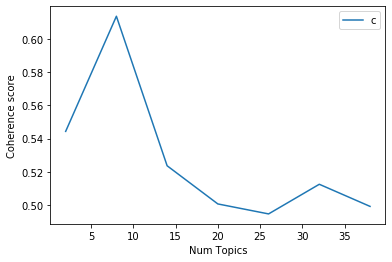

In [101]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [102]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5443
Num Topics = 8  has Coherence Value of 0.6135
Num Topics = 14  has Coherence Value of 0.5237
Num Topics = 20  has Coherence Value of 0.5007
Num Topics = 26  has Coherence Value of 0.4947
Num Topics = 32  has Coherence Value of 0.5126
Num Topics = 38  has Coherence Value of 0.4993


In [103]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.157*"phone" + 0.129*"camera" + 0.128*"battery" + 0.090*"issue" + '
  '0.088*"update" + 0.067*"software" + 0.062*"life" + 0.042*"system" + '
  '0.019*"bug" + 0.011*"oreo"'),
 (1,
  '0.074*"camera" + 0.073*"mode" + 0.069*"processor" + 0.054*"game" + '
  '0.040*"depth" + 0.037*"front" + 0.037*"android" + 0.033*"stock" + '
  '0.032*"bit" + 0.031*"effect"'),
 (2,
  '0.250*"mobile" + 0.187*"product" + 0.122*"phone" + 0.056*"delivery" + '
  '0.044*"superb" + 0.035*"box" + 0.019*"class" + 0.016*"buy" + 0.016*"rate" + '
  '0.013*"offer"'),
 (3,
  '0.247*"product" + 0.078*"experience" + 0.051*"handset" + '
  '0.039*"expectation" + 0.038*"time" + 0.028*"piece" + 0.027*"till" + '
  '0.025*"week" + 0.020*"set" + 0.019*"issue"'),
 (4,
  '0.305*"phone" + 0.114*"feature" + 0.055*"budget" + 0.040*"smartphone" + '
  '0.033*"super" + 0.032*"killer" + 0.031*"sensor" + 0.025*"touch" + '
  '0.022*"specification" + 0.018*"fingerprint"'),
 (5,
  '0.125*"amazon" + 0.076*"service" + 0.063*"day" + 0.05

# Finding the dominant topic in each sentence

In [104]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)


In [105]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.0673,"phone, camera, battery, issue, update, softwar...",good but need updates and improvements
1,1,10.0,0.1046,"hour, day, charger, charge, %, turbo, charging...","worst mobile i have bought ever, battery is dr..."
2,2,10.0,0.0673,"hour, day, charger, charge, %, turbo, charging...",when i will get my 10% cash back.... its alrea...
3,3,5.0,0.0628,"amazon, service, day, customer, return, replac...",good
4,4,12.0,0.0673,"money, waste, hai, dont, heat, plz, ho, compan...",the worst phone everthey have changed the last...
5,5,9.0,0.0660,"note, lenovo, k8, model, brand, moto, year, ve...",only i'm telling don't buyi'm totally disappoi...
6,6,18.0,0.0673,"quality, sound, speaker, video, photo, earphon...","phone is awesome. but while charging, it heats..."
7,7,9.0,0.0948,"note, lenovo, k8, model, brand, moto, year, ve...",the battery level has worn down
8,8,11.0,0.0648,"ram, apps, card, feature, memory, user, review...",it's over hitting problems...and phone hanging...
9,9,12.0,0.0664,"money, waste, hai, dont, heat, plz, ho, compan...",a lot of glitches dont buy this thing better g...
